In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import exp, linspace, random
from scipy.optimize import curve_fit
#from lmfit import Model
from matplotlib import gridspec

from scipy import integrate, optimize
import datetime as dt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d

In [ ]:
dados=pd.read_csv("COVID19_Data_for_Mozambique_2_Vacinação.csv")

In [ ]:
N=2.9e7
dados

,report_date,daily,vaccinated,cumulative_completely_dosage,dosage,phase,vaccine type,Obs1,Obs2,Days,...,Days1,Booster,Booster_Ration,Days2,Goodness_vaacine,439913,Unnamed: 18,Goodness-original,Unnamed: 20,good
0,20210313.0,NaN,46439.0,0.0,1,1.0,NaN,NaN,Profissionais de Saúde,5.0,...,354.0,NaN,NaN,NaN,0.000000,462759.0,NaN,0.000000,NaN,0
1,20210322.0,NaN,57305.0,0.0,1,1.0,NaN,NaN,Profissionais de Saúde + actores ligados ao Se...,14.0,...,363.0,NaN,NaN,NaN,0.000000,467969.0,NaN,0.000000,NaN,0
2,20210805.0,58115.0,507050.0,439913.0,NaN,NaN,NaN,NaN,NaN,150.0,...,499.0,NaN,NaN,NaN,0.000000,478487.0,NaN,0.000000,NaN,0
3,20210806.0,97921.0,676903.0,462759.0,NaN,NaN,NaN,NaN,NaN,151.0,...,500.0,NaN,NaN,NaN,0.000000,485264.0,NaN,0.000000,NaN,0
4,20210807.0,97327.0,727096.0,467969.0,NaN,NaN,NaN,NaN,NaN,152.0,...,501.0,NaN,NaN,NaN,0.000000,498634.0,NaN,0.000000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.442336,NaN,NaN,0.442336,NaN,12827731
722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.443975,NaN,NaN,0.443975,NaN,12875270
723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444895,NaN,NaN,0.444895,NaN,12901953
724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.446031,NaN,NaN,0.446031,NaN,12934905


In [ ]:
# I translated the R0 in C++ from Dr. Ketevi into Python
def rzero( t,par): 

    alpha   = par[0]
    beta    = par[1]
    delta   = par[2]
    gamma   = par[3]
    epsilon = par[4]
    zeta    = par[5]
    lamda   = par[6]
    eta     = par[7]
    rho     = par[8]
    theta   = par[9]
    mu      = par[10]
    kappa   = par[11]
    nu      = par[12]
    chi     = par[13]
    sigma   = par[14]
    tau_a   = par[15]
    tau_b   = par[16]
    alpha_p = par[17]
    phi     = par[18]

      # Parameters
    r1=epsilon+zeta+lamda
    r2=eta+rho
    r3=theta+mu+kappa
    r4=nu+chi+tau_a
    r5=sigma+tau_b

      # Initial R0
    R0_initial=(alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)+delta*eta*epsilon/(r1*r2*r4)
    + delta*zeta*theta/(r1*r3*r4)) + alpha_p/r1

    R0 = R0_initial;

      # "Control" binary variables to compute the new R0 every time a policy has
      # changed the parameters
    plottato = 0
    plottato1 = 0
    plottato_bis = 0
    plottato_tris = 0
    plottato_quat = 0
    plottato_qint=0
    plottato_qint1=0
    plottato_qint2=0
    plottato8=0
    plottatoA=0
    plottatoB=0
    plottatoC=0
    plottatoD=0
    plottatoE=0
    plottatoF=0
    plottatoG=0
    plottatoH=0
    plottatoI=0
    plottatoJ=0
    plottatoK=0
    plottatoL=0
    plottatoM=0
    plottatoN=0
    plottatoO=0
    plottatoP=0
    plottatoQ=0
    plottatoR=0
    plottatoS=0  
    plottatoT=0
    plottatoU=0
    plottatoV=0
    plottatoW=0
    plottatoX=0
    plottatoY=0 
    plottatoZ=0
    plottatoa=0   
    plottatob=0
    plottatoc=0
    plottatod=0
    plottatoe=0
    plottatof=0
    plottatog=0
    plottatoh=0
    plottatoi=0
    plottatoj=0
    plottatok=0  
    plottatol=0
    plottatom=0
    plottaton=0
    plottatoo=0
    plottatop=0
    plottatoq=0 
    plottator=0
    plottatos=0
    plottatot=0  
    plottatou=0
    plottatov=0
    plottatow=0
    plottatoy=0
    plottatox=0
    plottatoz=0    
      # Basic social distancing (awareness, schools closed)
        
    if (t<495):
        tau_a   = 0.00
        phi     = 0.00
        alpha_p = 0.00
        
        
    if (t >= 0 ):
        alpha= 0.68 #0.48 0.4218;
        gamma= 0.68 #0.38 #0.285;
        beta = 0.55 #0.025 #0.0057;
        delta= 0.55 #0.025 #0.0057;

        lamda=0.0001 #0.00 #0.08;

        mu=0.642
        nu=0.653
        zeta=0.6532
        eta=0.6532
        
        rho=0.0
        kappa=0.0
        chi=0.0
        sigma=0.0
        tau_b=0.0

        # Compute the new R0
        if (plottato == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho;
            r3=theta+mu+kappa;
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            print(r5)
            R0_primemisure=alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)+delta*eta*epsilon/(r1*r2*r4)
            +delta*zeta*theta/(r1*r3*r4) + alpha_p/r1
            plottato = 1;
            R0 = R0_primemisure;

            # Screening limited to / focused on symptomatic subjects
            

    if (t>3):
        alpha= 0.07 #0.22 #0.4218;
        gamma= 0.07 #0.12 #0.285;
        beta = 0.00057 #0.0057;
        delta= 0.00057 #0.0057;

        epsilon=0.01  #0.16  #0.1425;
        
        mu=0.642
        nu=0.753
        zeta=.07532
        eta=0.07532
        
        rho=0.0
        kappa=0.0
        chi=0.0
        sigma=0.0
        tau_b=0.000
        if (plottato1 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b
            R0_primemisureeps=alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)
            +delta*eta*epsilon/(r1*r2*r4)+delta*zeta*theta/(r1*r3*r4) + alpha_p/r1
            plottato1 = 1
            R0 = R0_primemisureeps
            
    if (t>10):
        alpha= 0.06 #0.22 #0.4218;
        gamma= 0.06 #0.12 #0.285;
        beta = 0.00077 #0.0057;
        delta= 0.00077 #0.0057;

        epsilon=0.01  #0.16  #0.1425;
        
        mu=0.642
        nu=0.753
        zeta=.07532
        eta=0.07532

        lamda=0.10   #; //0.08;

        rho=0.004     #;
        kappa=0.004    #;
        chi=0.004    #;
        sigma=0.004   #;
        tau_b = 0.000   #;       
        # { // Compute the new R0
        
    if (t>17):
        alpha=0.57 #; //0.36;
        beta=0.58 #; //0.005;
        gamma=0.57 #; //0.2;
        delta=0.548 #; //0.005;

        epsilon=0.020  #; //0.1425;
        theta=0.020

        mu = 0.92 #; //0.008;
        nu = 0.92 #; //0.015;

        zeta=0.91  #; //0.034;
        eta=0.91 #; //0.034;

        lamda=0.07 #; //0.08;

        rho=0.007
        kappa=0.007
        chi=0.007
        sigma=0.007
        tau_b=0.000
        
    if (t>29):
        alpha=0.2 #; //0.36;
        beta=0.2  #; //0.005;
        gamma=0.2 #; //0.2;
        delta=0.2 #; //0.005;

        epsilon=0.0612   #; //0.1425;
        theta=0.0820

        mu = 0.65  #; //0.008;
        nu = 0.65  #; //0.015;

        zeta=0.65 #; //0.034;
        eta=0.65 #; //0.034;

        lamda=0.06 #; //0.08;

        rho=0.001
        kappa=0.001
        chi=0.001
        sigma=0.001
        tau_b= 0.000

      # { // Compute the new R0
        if (plottato_tris == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_terzemisure=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4) + alpha_p/r1;
            plottato_tris = 1
            R0 = R0_terzemisure
            
    if (t>39): #{ // Broader diagnosis campaign

        alpha=0.675; #//0.36;
        beta=0.455; #//0.005;
        gamma=0.56; #//0.2;
        delta=0.455; #//0.005;
    
        epsilon=0.512; #//0.1425;
    
        theta=0.620;
    
        mu = 0.68; #//0.008;
        nu = 0.68; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;

        
        lamda=0.01; #//0.08;
        
        rho=0.0012;
        kappa=0.0012;
        chi=0.0012;
        sigma=0.04;
        tau_b= 0.000

        if (plottato8 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_quartemisure=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4) + alpha_p/r1
            plottato8 = 1
            R0 = R0_quartemisure 
            
    if (t>54): #{ // Broader diagnosis campaign

        alpha=0.35; #//0.36;
        beta=0.25; #//0.005;
        gamma=0.35; #//0.2;
        delta=0.25; #//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.01; #//0.08;
        
        rho=0.00012;
        kappa=0.00012;
        chi=0.00012;
        sigma=0.004;
        tau_b= 0.001

        if (plottato_qint == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_qintemisure=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1
            plottato_qint = 1
            R0 = R0_qintemisure   
                 
    if (t>62): #{ // Broader diagnosis campaign

        alpha=0.65; #//0.36;
        beta=0.55; #//0.005;
        gamma=0.65; #//0.2;
        delta=0.55; #//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.01; #//0.08;
        
        rho=0.0012;
        kappa=0.0012;
        chi=0.0012;
        sigma=0.04;
        tau_b= 0.001


        if (plottato_qint1 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau_b
            R0_qintemisure1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;

            plottato_qint1 = 1
            R0 = R0_qintemisure1  
 
    if (t>75): #{ // Broader diagnosis campaign

        alpha=0.315#; //0.36;
        beta=0.215  #; //0.005;
        gamma=0.315#; //0.2;
        delta=0.215 #; //0.005;

        epsilon=0.06  #; //0.1425;
        theta=0.08

        mu = 0.6   #; //0.008;
        nu = 0.6    #; //0.015;

        zeta=0.6    #; //0.034;
        eta=0.6   #; //0.034;

        lamda=0.015  #; //0.08;

        rho=0.01
        kappa=0.01
        chi=0.01
        sigma=0.01
        tau_b= 0.0003

        if (plottato_qint2 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_qintemisure2=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1
            plottato_qint2 = 1
            R0 = R0_qintemisure2
            

    if (t>112):
        
        alpha=0.75; #//0.36;
        beta=0.5; #//0.005;
        gamma=0.75; #//0.2;
        delta=0.5; #//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.01; #//0.08;
        
        rho=0.01;
        kappa=0.01;
        chi=0.01;
        sigma=0.01;
        tau_b= 0.0001
      # { // Compute the new R0
        if (plottatoA == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_A=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoA = 1
            R0 = R0_A

    if (t>116):
        
        alpha=0.31 #; //0.36;
        beta=0.21 #; //0.005;
        gamma=0.31  #; //0.2;
        delta=0.21  #; //0.005;

        epsilon=0.26  #; //0.1425;
        theta=0.38

        mu = 0.55    #; //0.008;
        nu = 0.55    #; //0.015;

        zeta=0.55   #; //0.034;
        eta=0.55   #; //0.034;

        lamda=0.08  #; //0.08;

        rho=0.009
        kappa=0.009
        chi=0.009
        sigma=0.009
        tau_b= 0.0003

      # { // Compute the new R0
        if (plottatoB == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_B=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoB = 1
            R0 = R0_B
            
            
    if (t>132):
     
        alpha=0.55; #//0.36;
        beta=0.55; #//0.005;
        gamma=0.55; #//0.2;
        delta=0.55; #//0.005;
    
        epsilon=0.6512; #//0.14257;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        
        lamda=0.01; #//0.08;

        rho=0.028
        kappa=0.028
        chi=0.028
        sigma=0.028 
        tau_b= 0.0001
        
      # { // Compute the new R0
        if (plottatoC == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_C=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoC = 1
            R0 = R0_C
        
    if (t>145):
     
        alpha=0.15#; //0.36;
        beta=0.0815  #; //0.005;
        gamma=0.25#; //0.2;
        delta=0.0815 #; //0.005;

        epsilon=0.06  #; //0.1425;
        theta=0.08

        mu = 0.6   #; //0.008;
        nu = 0.6    #; //0.015;

        zeta=0.6    #; //0.034;
        eta=0.6   #; //0.034;

        lamda=0.015  #; //0.08;

        rho=0.04
        kappa=0.041
        chi=0.041
        sigma=0.041
        tau_b= 0.00040


      # { // Compute the new R0
        if (plottatoD == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_D=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoD = 1
            R0 = R0_D    

    if (t>154):
     
        alpha=0.6 #; //0.36;
        beta=0.5  #; //0.005;
        gamma=0.6 #; //0.2;
        delta=0.5 #; //0.005;

        epsilon=0.0612   #; //0.1425;
        theta=0.0820

        mu = 0.65  #; //0.008;
        nu = 0.65  #; //0.015;

        zeta=0.65 #; //0.034;
        eta=0.65 #; //0.034;

        lamda=0.06 #; //0.08;

        rho=0.03
        kappa=0.03
        chi=0.03
        sigma=0.03
        tau_b= 0.0003

      # { // Compute the new R0
        if (plottatoE == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_E=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoE = 1
            R0 = R0_E                            


    if (t>162):
     
        alpha=0.29847 #; //0.36;
        beta=0.19838 #; //0.005;
        gamma=0.19847 #; //0.2;
        delta=0.29838 #; //0.005;

        epsilon=0.020  #; //0.1425;
        theta=0.020

        mu = 0.92 #; //0.008;
        nu = 0.92 #; //0.015;

        zeta=0.91  #; //0.034;
        eta=0.91 #; //0.034;

        lamda=0.07 #; //0.08;

        rho=0.03
        kappa=0.03
        chi=0.03
        sigma=0.03
        tau_b= 0.0003
      # { // Compute the new R0
        if (plottatoF == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_F=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoF = 1
            R0 = R0_F
            
            
    if (t>166):
     
        alpha=0.55; #//0.36;
        beta=0.55; #//0.005;
        gamma=0.55; #//0.2;
        delta=0.55; #//0.005;
    
        epsilon=0.6512; #//0.14257;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        
        lamda=0.01; #//0.08;
        

        rho=0.03
        kappa=0.03
        chi=0.03
        sigma=0.03
        tau_b= 0.0003
      # { // Compute the new R0
        if (plottatoG == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_G=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoG = 1
            R0 = R0_G
            
    if (t>171):
     
        alpha=0.55; #//0.36;
        beta=0.55; #//0.005;
        gamma=0.55; #//0.2;
        delta=0.55; #//0.005;
    
        epsilon=0.6512; #//0.14257;
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        
        lamda=0.01; #//0.08;
        
        rho=0.03
        kappa=0.03
        chi=0.03
        sigma=0.03
        tau_b= 0.0005
      # { // Compute the new R0
        if (plottatoH == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_H=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoH = 1
            R0 = R0_H
            
    if (t>179):
     
        alpha=0.15#; //0.36;
        beta=0.0815  #; //0.005;
        gamma=0.25#; //0.2;
        delta=0.0815 #; //0.005;

        epsilon=0.06  #; //0.1425;
        theta=0.08

        mu = 0.6   #; //0.008;
        nu = 0.6    #; //0.015;

        zeta=0.6    #; //0.034;
        eta=0.6   #; //0.034;

        lamda=0.015  #; //0.08;

        rho=0.04
        kappa=0.041
        chi=0.041
        sigma=0.041
        tau_b= 0.00050

      # { // Compute the new R0
        if (plottatoI == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_I=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoI = 1
            R0 = R0_I
            
            
    if (t>185):
     
        alpha=0.75; #//0.36;
        beta=0.64; #//0.005;
        gamma=0.75; #//0.2;
        delta=0.64; #//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.004
        kappa=0.041
        chi=0.0041
        sigma=0.041
        tau_b= 0.00050
        
      # { // Compute the new R0
        if (plottatoJ == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_J=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoJ = 1
            R0 = R0_J
            
            
            
    if (t>190):
     
        alpha=0.341095; #//0.36;
        beta=0.3410864; #//0.005;
        gamma=0.341095; #//0.2;
        delta=0.3410864; #//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.074
        kappa=0.0741
        chi=0.071
        sigma=0.0741
        tau_b= 0.00050
        
      # { // Compute the new R0
        if (plottatoK == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_K=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoK = 1
            R0 = R0_K
            
            
            
    if (t>203):
     
        alpha=0.6095; #//0.36;
        beta=0.650864; #//0.005;
        gamma=0.61095; #//0.2;
        delta=0.6510864; #//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.074
        kappa=0.0741
        chi=0.071
        sigma=0.0741
        tau_b= 0.00050
        
      # { // Compute the new R0
        if (plottatoL == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_L=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoL = 1
            R0 = R0_L
            
            
    if (t>214):
     
        alpha=0.199; #//0.36;
        beta=0.099864; #//0.005;
        gamma=0.199; #//0.2;
        delta=0.099864; #//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.0574
        kappa=0.05741
        chi=0.0571
        sigma=0.05741
        tau_b= 0.00050
        
      # { // Compute the new R0
        if (plottatoM == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_M=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoM = 1
            R0 = R0_M
            
            
    if (t>218):
     
        alpha=0.525735 #//0.36;
        beta=0.425735 #//0.005;
        gamma=0.525735 #//0.2;
        delta=0.425735 #//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.0574
        kappa=0.05741
        chi=0.0571
        sigma=0.05741
        tau_b= 0.00070
        
      # { // Compute the new R0
        if (plottatoN == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_N=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoN = 1
            R0 = R0_N           

            
    if (t>286):
     
        alpha=0.725735 #//0.36;
        beta=0.725735 #//0.005;
        gamma=0.7525735 #//0.2;
        delta=0.725735 #//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.0574
        kappa=0.05741
        chi=0.0571
        sigma=0.05741
        tau_b= 0.00050
        
      # { // Compute the new R0
        if (plottatoO == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_O=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoO = 1
            R0 = R0_O      
        

    if (t>290):
     
        alpha=0.5 #//0.36;
        beta=0.5 #//0.005;
        gamma=0.5 #//0.2;
        delta=0.5#//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.03574
        kappa=0.035741
        chi=0.03571
        sigma=0.035741
        tau_b= 0.0020
        
      # { // Compute the new R0
        if (plottatoP == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_P=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoP = 1
            R0 = R0_P
            
            

    if (t>300):
     
        alpha=0.433 #//0.36;
        beta=0.433#//0.005;
        gamma=0.433 #//0.2;
        delta=0.433#//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.0231574
        kappa=0.0231574
        chi=0.0231574
        sigma=0.0231574
        tau_b= 0.0007
        
      # { // Compute the new R0
        if (plottatoQ == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_Q=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoQ = 1
            R0 = R0_Q



    if (t>328):
     
        alpha=0.448 #//0.36;
        beta=0.448 #//0.005;
        gamma=0.448 #//0.2;
        delta=0.448 #//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.045
        kappa=0.045
        chi=0.045
        sigma=0.045
        tau_b= 0.00037
        
        
      # { // Compute the new R0
        if (plottatoR == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_R=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoR = 1
            R0 = R0_R

    if (t>350):
     
        alpha=0.42 #//0.36;
        beta=0.42 #//0.005;
        gamma=0.42 #//0.2;
        delta=0.42 #//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.035
        kappa=0.035
        chi=0.035
        sigma=0.035
        tau_b= 0.00037
        
      # { // Compute the new R0
        if (plottatoS == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_S=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoS = 1
            R0 = R0_S          
                        

    if (t>396):
     
        alpha=0.01 #//0.36;
        beta=0.01 #//0.005;
        gamma=0.01 #//0.2;
        delta=0.01 #//0.005;
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.099
        kappa=0.099
        chi=0.099
        sigma=0.099
        tau_b= 0.00037
        
      # { // Compute the new R0
        if (plottatoT == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_T=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoT = 1
            R0 = R0_T          
                          
 
    if (t>417):
     
        alpha=0.31 #//0.36;
        beta=0.31 #//0.005;
        gamma=0.31 #//0.2;
        delta=0.31 #//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.031
        kappa=0.031
        chi=0.031
        sigma=0.031
        tau_b= 0.00037
        
        
      # { // Compute the new R0
        if (plottatoU == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_U=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoU = 1
            R0 = R0_U                  
                

    if (t>425):
     
        alpha=0.512 #//0.36;
        beta=0.512 #//0.005;
        gamma=0.512 #//0.2;
        delta=0.512#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.00231
        kappa=0.00231
        chi=0.00231
        sigma=0.00231
        tau_b= 0.00037
        
        
      # { // Compute the new R0
        if (plottatoV == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_V=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoV = 1
            R0 = R0_V          
                                     

    if (t>450):
     
        alpha=0.32 #//0.324;
        beta=0.32 #//0.005;
        gamma=0.32 #//0.2;
        delta=0.32#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.009 #0.0002
        kappa=0.009
        chi=0.009
        sigma=0.009
        tau_b= 0.00037
        
        
        
      # { // Compute the new R0
        if (plottatoW == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_W=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoW = 1
            R0 = R0_W 
                
                                
                                
                                  
    if (t>473):#469
     
        alpha=0.22 #//0.22;
        beta=0.22 #//0.005;
        gamma=0.22 #//0.2;
        delta=0.22#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.031 #0.009
        kappa=0.031
        chi=0.031
        sigma=0.031
        tau_b= 0.000837
        

        
        
      # { // Compute the new R0
        if (plottatoX == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_X=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoX = 1
            R0 = R0_X                 
 
    if (t>491):#469
     
        alpha=0.22 #//0.22;
        beta=0.22 #//0.005;
        gamma=0.22 #//0.2;
        delta=0.22#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        lamda=0.001; #//0.08;
        
        lamda=0.015  #; //0.08;

        rho=0.031 #0.009
        kappa=0.031
        chi=0.031
        sigma=0.031
        tau_b= 0.000837
        
        tau_a   = 0.0001
        phi     = 0.003#0.0018
        alpha_p = 0.003#0.0018 
        
        
      # { // Compute the new R0
        if (plottatoa == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_a=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoa = 1
            R0 = R0_a  


    if (t>495):
        
        alpha=0.0952 #//0.22;
        beta=0.0952 #//0.005;
        gamma=0.0952 #//0.2;
        delta=0.0952#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.048  #; //0.08;

        rho=0.048 #0.001231
        kappa=0.048
        chi=0.048
        sigma=0.048
        tau_b= 0.000837
        
        tau_a   = 0.0006
        phi     = 0.0006 #0.001
        alpha_p = 0.00081 #0.001        
      

        
      # { // Compute the new R0
        if (plottatoY == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_Y=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoY = 1
            R0 = R0_Y     

    

    if (t>500):
        
        alpha=0.352 #//0.22;
        beta=0.352 #//0.005;
        gamma=0.352 #//0.2;
        delta=0.352#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.098  #; //0.08;

        rho=0.098 #0.001231
        kappa=0.098
        chi=0.098
        sigma=0.098
        tau_b= 0.000837
        
        tau_a   = 0.0001
        phi     = 0.0006
        alpha_p = 0.0006
        

        
      # { // Compute the new R0
        if (plottatoZ == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_Z=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoZ = 1
            R0 = R0_Z     

      
    if (t>514):
        
        alpha=0.16 #//0.22;
        beta=0.16 #//0.005;
        gamma=0.16 #//0.2;
        delta=0.16#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.098  #; //0.08;

        rho=0.067 #0.001231
        kappa=0.067
        chi=0.067
        sigma=0.067
        tau_b= 0.000837
        
        tau_a   = 0.000
        phi     = 0.00
        alpha_p = 0.00
        

        
      # { // Compute the new R0
        if (plottatob == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_b=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatob = 1
            R0 = R0_b              
            
    if (t>522):
        
        alpha=0.099 #//0.22;
        beta=0.099 #//0.005;
        gamma=0.099 #//0.2;
        delta=0.099#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.098  #; //0.08;

        rho=0.067#0.0598 
        kappa=0.067
        chi=0.067
        sigma=0.067
        tau_b= 0.000837
        
        tau_a   = 0.0001
        phi     = 0.0024
        alpha_p = 0.0024
        

        
      # { // Compute the new R0
        if (plottatoc == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_c=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoc = 1
            R0 = R0_c             
                        
    if (t>540):
        
        alpha=0.35 #//0.22;
        beta=0.35 #//0.005;
        gamma=0.35#//0.2;
        delta=0.35#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.098  #; //0.08;

        rho=0.0598 #0.001231
        kappa=0.0598
        chi=0.0598
        sigma=0.0598
        tau_b= 0.000837
        
        tau_a   = 0.000
        phi     = 0.00
        alpha_p = 0.00
        

        
      # { // Compute the new R0
        if (plottatod == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_d=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatod = 1
            R0 = R0_d             
                             
                
    if (t>560):
        
        alpha=0.35 #//0.22;
        beta=0.35 #//0.005;
        gamma=0.35#//0.2;
        delta=0.35#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.098  #; //0.08;

        rho=0.0598 #0.001231
        kappa=0.0598
        chi=0.0598
        sigma=0.0598
        tau_b= 0.000837
        
        tau_a   = 0.000
        phi     = 0.00
        alpha_p = 0.00
        

        
      # { // Compute the new R0
        if (plottatoe == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_e=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoe = 1
            R0 = R0_e             
                                             
    if (t>575):
        
        alpha=0.001 #//0.22;
        beta=0.001 #//0.005;
        gamma=0.001#//0.2;
        delta=0.001#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.098  #; //0.08;

        rho=0.2098 #0.001231
        kappa=0.2098
        chi=0.2098
        sigma=0.2098
        tau_b= 0.000837
        
        tau_a   = 0.0001
        phi     = 0.0001
        alpha_p = 0.0001
        

        
      # { // Compute the new R0
        if (plottatoe == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_e=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoe = 1
            R0 = R0_e             
                                       

    if (t>584):
        
        alpha=0.1 #//0.22;
        beta=0.1 #//0.005;
        gamma=0.1#//0.2;
        delta=0.1#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.098  #; //0.08;

        rho=0.023 #0.001231
        kappa=0.023
        chi=0.024
        sigma=0.024
        tau_b= 0.000837
        
        tau_a   = 0.0001
        phi     = 0.002
        alpha_p = 0.002
        

        
      # { // Compute the new R0
        if (plottatof == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_f=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatof = 1
            R0 = R0_f             
                                       
    if (t>598):
        
        alpha=0.59 #//0.22;
        beta=0.59 #//0.005;
        gamma=0.59#//0.2;
        delta=0.59#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.008  #; //0.08;

        rho=0.008 #0.001231
        kappa=0.008
        chi=0.00068
        sigma=0.00068
        tau_b= 0.000837
        
        tau_a   = 0.0002
        phi     = 0.0025
        alpha_p = 0.0025
        

        
      # { // Compute the new R0
        if (plottatog == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_g=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatog = 1
            R0 = R0_g                

            
            
    if (t>622):
        
        alpha=0.43 #//0.22;
        beta=0.43 #//0.005;
        gamma=0.43#//0.2;
        delta=0.43#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768; #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.098  #; //0.08;

        rho=0.002 #0.001231
        kappa=0.002
        chi=0.002
        sigma=0.002
        tau_b= 0.000837
        
        tau_a   = 0.0001
        phi     = 0.0037
        alpha_p = 0.0037
        

        
      # { // Compute the new R0
        if (plottatoh == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_h=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoh = 1
            R0 = R0_h                
                                
    if (t>643):
        
        alpha=0.21 #//0.22;
        beta=0.21 #//0.005;
        gamma=0.21#//0.2;
        delta=0.21#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768 #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.04  #; //0.08;

        rho=0.04 #0.001231
        kappa=0.04
        chi=0.04
        sigma=0.04
        tau_b= 0.0002
        
        tau_a   = 0.0001
        phi     = 0.0035
        alpha_p = 0.0035
        

        
      # { // Compute the new R0
        if (plottatoi == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_i=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoi = 1
            R0 = R0_i               


                                        
    if (t>659):
        
        alpha=0.001 #//0.22;
        beta=0.001 #//0.005;
        gamma=0.001#//0.2;
        delta=0.001#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768 #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.099  #; //0.08;

        rho=0.099 #0.001231
        kappa=0.099
        chi=0.099
        sigma=0.099
        tau_b= 0.0002
        
        tau_a   = 0.0001
        phi     = 0.0057
        alpha_p = 0.0057
        

        
      # { // Compute the new R0
        if (plottatoj == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_j=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatoj = 1
            R0 = R0_j   
                     
                     
    if (t>679):
        
        alpha=0.3 #//0.22;
        beta=0.3 #//0.005;
        gamma=0.3#//0.2;
        delta=0.3#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768 #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.019  #; //0.08;

        rho=0.019 #0.001231
        kappa=0.019
        chi=0.019
        sigma=0.019
        tau_b= 0.0002
        
        tau_a   = 0.0001
        phi     = 0.004
        alpha_p = 0.004
        

        
      # { // Compute the new R0
        if (plottatok == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_k=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatok = 1
            R0 = R0_k                 
                
    if (t>710):
        
        alpha=0.003 #//0.22;
        beta=0.003 #//0.005;
        gamma=0.003#//0.2;
        delta=0.003#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768 #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.901  #; //0.08;

        rho=0.901 #0.001231
        kappa=0.901
        chi=0.901
        sigma=0.901
        tau_b= 0.0002
        
        tau_a   = 0.0001
        phi     = 0.0045
        alpha_p = 0.0045
        

        
      # { // Compute the new R0
        if (plottatol == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_l=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatol = 1
            R0 = R0_l                 
                        
            
    if (t>714):
        
        alpha=0.0903 #//0.22;
        beta=0.0903 #//0.005;
        gamma=0.0903#//0.2;
        delta=0.0903#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768 #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.001  #; //0.08;

        rho=0.001 #0.001231
        kappa=0.001
        chi=0.001
        sigma=0.001
        tau_b= 0.0002
        
        tau_a   = 0.0001
        phi     = 0.0045
        alpha_p = 0.0045
        

        
      # { // Compute the new R0
        if (plottatom == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_m=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottatom = 1
            R0 = R0_m                  
                            
    if (t>719):
        
        alpha=0.0903 #//0.22;
        beta=0.0903 #//0.005;
        gamma=0.0903#//0.2;
        delta=0.0903#//0.005;g
    
        epsilon=0.6512; #//0.1425;
    
        theta=0.7620;
    
        mu = 0.768 #//0.008;
        nu = 0.768; #//0.015;
    
        zeta=0.298; #//0.034;
        eta=0.298; #//0.034;
        ; #//0.08;
        
        lamda=0.09  #; //0.08;

        rho=0.09 #0.001231
        kappa=0.09
        chi=0.09
        sigma=0.09
        tau_b= 0.0002
        
        tau_a   = 0.0001
        phi     = 0.0045
        alpha_p = 0.0045
        

        
      # { // Compute the new R0
        if (plottaton == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_n=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottaton = 1
            R0 = R0_n                  
                                 
               
            
            
            
            

                
    par= alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,tau_b,tau_a,phi,alpha_p           

    return R0,par;




In [ ]:
#t1 = data_time[:521]

data_infected = [1,3,3,5,7,8,8,8,8,10,10,10,10,10,10,10,17,17,20,20,21,21,28,29,31,34,35,39,39,39,41,
                 46,65,70,76,76,76,76,76,79,79,80,80,81,81,81,82,87,91,103,104,107,115,119,129,137,
                 145,146,156,162,164,168,194,209,213,227,233,234,244,254,254,307,316,352,354,409,424,
                 433,453,472,489,509,553,583,609,638,651,662,668,688,733,737,757,762,788,816,839,859,
                 883,889,903,918,939,969,987,1012,1040,1071,1092,1111,1135,1157,1219,1268,1330,1383,
                 1402,1435,1491,1507,1536,1557,1582,1590,1616,1669,1701,1720,1748,1808,1864,1907,1946,
                 1973,2029,2079,2120,2213,2241,2269,2411,2481,2559,2638,2708,2791,2855,2914,2991,3045,
                 3115,3195,3304,3395,3440,3508,3590,3651,3697,3760,3821,3916,4039,4117,4207,4265,4341,
                 4444,4557,4647,4764,4832,4918,5040,5264,5482,5713,5994,6161,6264,6537,6771,6912,7114,
                 7262,7399,7589,7757,7983,8288,8556,8728,8888,8979,9049,9196,9296,9398,9494,9639,9742,
                 9844,10001,10088,10258,10093,10537,10612,10707,10866,11080,11190,11331,11559,11748,
                 11895,12161,12273,12415,12525,12777,12869,12988,13130,13202,13283,13391,13485,13577,
                 13768,13823,13892,13991,14094,14227,14340,14448,14514,14566,14629,14723,14877,14981,
                 15037,15109,15231,15302,15467,15506,15586,15613,15701,15770,15866,15918,16038,16133,
                 16244,16326,16373,16440,16521,16680,16812,16954,17002,17042,17143,17256,17338,17447,
                 17568,17695,17767,17956,18031,18108,18162,18265,18310,18372,18485,18646,18794,18968,
                 19309,19463,19542,19667,19961,20482,21361,21939,22334,22996,23726,24269,25004,25862,
                 26551,27446,28270,29396,30225,30848,31628,32418,32781,34055,34926,35833,37108,37705,
                 38654,39460,40260,41433,42488,43184,44112,44600,44912,45785,46736,47790,48588,49451,
                 50265,50691,51800,52629,53527,54204,54968,55643,56160,56595,56920,57597,58218,58772,
                 59350,59607,59914,60395,61170,61529,62131,62520,62703,62882,63174,63645,64004,64296,
                 64516,64642,64929,65197,65452,65799,66064,66212,66306,66496,66649,66762,66879,67011,
                 67197,67292,67466,67579,67729,67923,68005,68119,68227,68292,68431,68466,68506,68578,
                 68758,68792,68871,68927,69002,69067,69134,69203,69228,69309,69437,69523,69597,69643,
                 69665,69715,69762,69804,69864,69917,69965,69984,70000,70031,70052,70108,70138,70166,
                 70212,70238,70267,70287,70315,70361,70410,70442,70463,70485,70509,70527,70551,70568,
                 70590,70606,70636,70651,70673,70657,70724,70780,70795,70850,70923,70965,71019,71082,
                 71114,71145,71165,71239,71279,71355,71461,71538,71568,71651,71929,72123,72367,72507,
                 72577,72775,73211,73652,74186,74704,75138,75422,75828,76404,77205,78074,79213,80151,
                 80888,82346,83485,84922,86249,87935,88868,90555,91886,93429,94733,96127,98152,99412,
                 100785,102009,103713,105866,107309,108760,110288,111723,113426,115886,117660,119950,
                 122028,123541,124962,126391,127425,129036,130526,131799,132452,133177,134343,135528,
                 136566,137413,138344,138749,139038,140071,140765,141383,142013,142523,142784,143127,
                 143655,144032,144468,145199,145724,145863,146053,146316,146754,147066,147431,147785,
                 147923,148054,148444,148552,148727,148901,149088,149207,149259,149480,149671,149804,
                 149906,149981,150018,150067,150201,150280,150370,150439,150494,150530,150540,150572,
                 150662,150723,150759,150790,150804,150807,150826,150874,150899,150935,150963,150985,
                 150991,151018,151046,151061,151080,151097,151102,151112,151136,151157,151174,151195,
                 151220,151225,151226,151243,151253,151260,151270,151288,151292,151302,151316,151325,
                 151339,151352,151367,151368,151371,151382,151390,151410,151414,151422,151427,151432,
                 151457,151466,151472,151477,151488,151488,151492,151495,151503,151512,151515,151524,
                 151520,151548,151594,151652,151763,151868,151924,152000,152120,152326,152586,152965,
                 153408,153674,153787,154520,155495,156729,158111,159363,159904,160457,162525, 164862,
                 167307,170077,170975,172175,175648,179272,184219,189080,191722,192453,193371,196346,
                 199940,203241,206272,209389,210399,210991,212859,214807,216559,217821,218797,219081,
                 219390,220241,220908,221232,221975,222415,222596,222652,222892,223112,223413,223612,
                 223738,223811,223827,223949,224043,224143,224224,224309,224339,224347,224434,224494,
                 224556,224603,224653,224703,224719,224767,224791,224815,224841,224882,224903,224920,
                 224937,224983,224999,225018,225036,225038,225047,225063,225080,225100,224121,225135,
                 225140,225140,225150,225159,225162,225165,225173,225179,225179,225188,225195,225200,
                 225201,225206,225210,225211,225215]
print(len(data_infected))

data_time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
             41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,
             79,80,81,82,83,84,85,86,87,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,
             113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,
             141,142,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,159,159,160,161,162,163,164,165,166,167,
             168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,
             196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,
             224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,
             252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,
             280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,
             308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,
             336, 337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,
             364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,
             380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,
             408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,
             436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,
             464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,
             491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,
             519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,
             547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,
             575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,
             602,603,604,605,606,607,608,609,610,611,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,
             632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,
             660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,
             690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,
            720,721,722,723,724,725,726];
print(len(data_time))
# No dia 612 nao tivemos dados disponibilizados pelo gonerno
data_recovered = [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,4,8,8,8,8,9,9,9,9,9,9,9,10,10,
                  18,19,19,19,21,24,27,34,34,34,34,35,42,42,43,44,46,48,48,48,48,51,51,71,71,71,82,84,
                  90,91,97,98,109,114,119,126,127,131,136,138,144,145,151,151,157,160,169,175,177,177,
                  181,181,206,220,221,223,225,228,229,232,248,249,249,256,270,277,280,337,340,344,349,
                  364,369,373,375,380,397,408,472,505,506,523,528,532,543,593,596,602,616,638,641,645,
                  654,676,765,778,795,827,832,840,860,910,951,1015,1075,1136,1163,1196,1247,1291,1380,
                  1406,1474,1503,1661,1809,1927,1968,2055,2078,2100,2170,2283,2328,2370,2511,2579,
                  2615,2697,2715,2763,2857,2899,2905,2960,3024,3181,3267,3393,3502,3620,3622,3738,
                  4064,4350,4558,4649,4769,4807,4836,5205,5232,5573,5595,5736,5852,6104,6358,6812,
                  6911,7171,7203,7338,7550,7880,8035,8214,8262,8272,8513,8836,9007,9165,9226,9234,
                  9244,9254,9282,9785,10001,10437,10437,10439,10439,10695,10983,11177,11275,11581,
                  11605,11659,11748,11959,12134,12238,12505,12543,12599,12646,12754,12849,13053,13151,
                  13151,13229,13408,13459,13520,13631,13677,13677,13729,13778,14014,14030,14160,14343,
                  14416,14429,14437,14684,14715,14793,14795,14818,15006,15117,15241,15257,15365,15451,
                  15454,15733,15856,15982,16015,16015,16109,16119,16178,16439,16589,16663,16680,16684,
                  16765,16828,17069,17141,17455,17479,17521,17535,17623,18170,18282,18352,18371,18515,
                  18607,18880,19132,19484,19510,19858,20002,20558,21011,21343,22494,22750,23559,23945,
                  23955,24593,25010,25485,25673,26212,26790,27162,27438,27814,29395,30124,31016,31506,
                  31699,31947,32262,32857,33804,34389,34921,35267,36224,36224,37570,37870,38676,39806,
                  40761,41096,41413,42797,44002,44282,45884,46294,46421,46594,46594,48451,48616,48938,
                  49814,50380,50534,50844,51376,52363,52391,52527,52683,52882,53188,53803,54095,55074,
                  55167,55275,55371,55651,56409,56835,56841,56965,57124,57234,57926,58063,58129,58236,
                  58283,58944,59901,59972,61112,61188,61207,61293,62315,62323,62342,62394,62408,62452,
                  62501,62927,64448,64541,65536,65913,66883,66931,67325,67343,67343,67696,67706,67749,
                  67785,67799,67884,68047,68314,68487,68710,68725,68731,68749,68777,68845,68868,69092,
                  69098,69100,69117,69193,69227,69232,69499,69507,69525,69547,69555,69641,69652,69656,
                  69662,69687,69687,69709,69740,69878,69878,69881,69889,69937,70028,70030,70041,70049,70241,70289,
                  70300,70352,70571,70599,71081,71150,71186,71205,71491,71609,71628,71634,72167,72404,
                  72437,72449,72894,72899,73617,73880,74211,74392,74918,75125,76269,76716,76839,78337,
                  80058,80773,82299,82616,82766,84993,86078,86423,87256,88081,88380,90845,95815,96446,
                  100912,101333,101875,102389,102957,107443,108516,114041,115931,116945,117399,118450,
                  119559,121449,122222,122747,123350,124681,126041,126313,127852,128219,130265,130642,
                  130921,131533,132397,133574,134400,135431,135638,136629,137334,137891,138695,139320,
                  140641,140961,141150,141392,142178,142381,142769,144875,145013,145382,145606,145659,
                  145885,146090,146155,146372,146492,146544,146588,146843,146966,146969,147281,147397,
                  147397,147583,147605,147647,147847,147847,147850,147876,147955,148038,148064,148066,
                  148099,149099,148187,148474,148583,148594,148611,148643,148645,148660,148666,148979,
                  148994,149182,149209,149209,149209,149211,149248,149253,149270,149298,149298,149299,
                  149321,149349,149349,149349,149350,149355,149368,149403,149403,149407,149407,149419,
                  149419,149419,149460,149460,149461 ,149467,149471,149485,149485,149514,149538,149538,
                  149574,149575,149575,149575,149575,149583,149622,149943,149955,149958,149964,149989,
                  150015,150206,150239,150431,150435,150484,150517,151223,151241,151290,151290,152575,
                  153026,153731,156003,156570,156576,157184,158689,159567,161153,165271,165460,165660,
                  169090,170892,173538,175561,177608,179680,180990,180990,189069,193145,194629,196850,
                  198303,199542,202160,205273,206393,208116,208770,209396,209564,213070,213368,215417,
                  215446,215487,215935,216889,217112,217367,217479,217675,217951,218211,218263,218278,
                  218433,218558,218694,218829,218900,218911,218922, 219109,219163,219279,219297,219320,
                  219320,219321,219430,219638,219863,219868,219897,219897,219897,220817, 222415,222783,
                  222862,222875,222875,222875,222892,222909,222909,222909,222928,222939,222944,222951,222958 ]
print(len(data_recovered))

data_dead = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,4,4,
             4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,7,8,8,8,8,9,9,9,9,9,9,9,9,10,10,11,11,11,11,11,11,11,11,
             11,11,11,11,12,13,14,15,15,15,15,16,16,16,17,19,19,19,19,19,19,19,19,20,20,20,20,21,21,
             21,21,21,22,23,23,23,25,26,26,26,27,27,28,28,31,31,35,35,35,37,39,39,40,41,43,44,45,49,
             51,53,54,58,59,59,61,62,64,64,66,66,67,68,68,69,70,71,72,73,73,73,73,74,75,75,78,79,81,
             82,85,88,89,91,91,91,92,93,94,95,95,97,99,99,99,99,99,104,104,110,110,113,116,118,119,
             120,121,123,124,126,127,128,128,128,129,130,131,131,132,132,133,133,133,136,136,138,139,
             139,140,142,143,144,145,145,146,147,148,149,150,153,156,156,159,161,162,163,165,166,167,
             168,169,171,171,172,176,181,187,192,197,201,205,211,216,234,241,249,253,271,283,290,297,
             305,319,329,336,347,356,363,367,386,403,415,427,436,451,460,465,480,486,501,514,525,535,
             547,551,561,571,583,587,595,599,606,608,613,620,630,641,653,665,668,674,680,686,693,698,
             700,707,711,719,722,725,729,732,733,737,740,743,746,747,750,752,753,758,762,764,769,772,775,775,778,782,782,782,
             785,785,788,789,789,791,791,794,794,794,797,798,798,800,802,805,805,806,807,807,809,814,814,814,814,814,815,815,
             817,818,819,820,821,823,825,826,826,826,826,826,826,828,828,828,828,831,831,831,831,833,834,834,835,836,836,836,
             863,836,837,837,837,837,838,839,840,840,840,840,841,841,842,844,844,847,848,848,852,857,863,865,867,868,869,872,
             878,884,888,897,904,912,923,934,939,947,962,982,996,1013,1033,1057,1075,1099,1118,1138,1158,1190,1221,1232,1257,
             1282,1307,1341,1367,1388,1407,1434,1462,1479,1500,1526,1538,1566,1600,1613,1628,1641,1655,1671,1690,1707,1716,1731,
             1748,1761,1773,1783,1785,1800,1808,1813,1822,1825,1834,1842,1851,1853,1864,1866,1871,1872,1877,1878,1881,1885,1888,
             1891,1892,1892,1892,1894,1895,1898,1902,1903,1903,1903,1903,1903,1906,1907,1908,1909,1909,1910,1912,1915,1917,1918,
             1918,1919,1919,1919,1919,1921,1922,1922,1924,1924,1924,1924,1925,1925,1925,1926,1927,1927,1927,1927,1927,1928,1928,
             1928,1929,1929,1929,1929,1930,1930,1931,1932,1932,1932,1933,1934,1934,1934,1934,1934,1934,1934,1934,1936,1936,1936,
             1936,1936,1936,1936,1938,1938,1939,1940,1940,1940,1940,1940,1941, 1941,1941,1941,1941,1941,1941,1941,1941,1941,1942,
             1942,1944,1945,1945,1946,1948,1948,1950,1952,1952,1957,1960,1961,1965,1967,1973,1976,1988,1996,2006,2012,2019,2031,
             2042,2050,2065,2075,2077,2085,2096,2099,2105,2109,2117,2123,2127,2132,2136,2140,2146,2149,2153,2157,2159,2161,2163,
             2164,2165,2167,2170,2173,2174,2180,2180,2183,2183,2183,2183,2185,2186,2188,2188,2189,2189,2189,2189,2189,2189,2189,
             2189,2189,2190,2190,2191,2192,2192,2192,2192,2192,2192,2193,2194,2195,2196,2196,2196,2197,2198,2198, 2198,2198,2198,
            2198,2198,2198,2199,2199,2199,2200,2200,2200]
print(len(data_dead))

data_active = [1,3,3,5,7,8,8,8,8,10,10,10,9,9,9,9,16,16,18,18,19,19,26,27,29,32,31,31,31,31,33,37,56,
               61,67,67,67,67,66,69,61,61,61,62,60,57,55,53,57,69,70,73,80,77,86,93,99,98,108,114,116,
               117,143,137,141,155,149,148,152,160,154,206,204,235,232,280,294,299,314,331,342,361,
               399,428,448,473,447,482,486,506,546,550,545,536,561,586,607,624,646,649,647,661,682,
               704,707,725,750,724,741,756,775,782,839,884,944,992,994,1015,1007,989,1017,1021,1041,
               1045,1060,1063,1092,1105,1119,1157,1210,1248,1277,1281,1247,1284,1308,1369,1391,1411,
               1533,1552,1587,1602,1612,1634,1671,1697,1723,1733,1711,1765,1806,1868,1754,1674,1638,
               1658,1617,1656,1694,1719,1729,1760,1807,1724,1732,1798,1829,1900,1969,1940,1985,2096,
               2270,2419,2491,2684,2725,2718,2872,3101,3126,3001,2859,2786,2883,2930,3114,3389,3288,
               3431,3249,3316,3245,3274,3122,2989,2610,2656,2498,2570,2592,2462,2301,2280,2139,2273,
               2357,2274,2169,2101,2083,2248,2428,2562,2815,2898,2535,2429,2245,2336,2452,2593,2408,
               2201,2113,2107,1893,2060,2061,2041,1924,1852,1875,1721,1788,1795,1798,1752,1750,1699,
               1703,1758,1750,1692,1711,1815,1743,1776,1802,1837,1857,1716,1752,1741,1653,1691,1757,
               1796,1614,1663,1744,1742,1990,1849,1777,1753,1850,1823,1875,1962,1809,1757,1817,1856,
               1933,1890,1981,1966,1766,1727,1809,1943,2112,2371,2460,2298,2350,2336,2818,3649,4208,
               4510,4621,5225,5702,6413,7109,7699,8313,8881,9637,10428,10696,11325,11551,11447,12379,
               12092,12732,12239,13393,14328,14477,14843,15529,16384,16532,16867,16974,17005,17487,
               17851,17161,17054,17416,18031,18193,18983,19207,19148,19228,19460,19777,19333,18415,18438,18304,17788,17377,
               17609,17537,16448,15721,16210,14961,15147,15402,15407,14449,14012,14314,14343,13756,13407,13375,13349,13084,
               12348,12668,12790,12779,12673,12554,12090,11910,11043,11078,11154,11148,11039,10391,10115,10300,10254,10209,
               10207,9577,9579,9545,9477,9502,9059,8596,8171,8157,7092,7078,7125,7108,6109,6180,6286,6320,6379,6380,6353,5975,
               4456,4405,3470,3186,2264,2234,1856,1867,1887,1589,1608,1592,1600,1610,1553,1410,1171,1044,870,887,900,904,900,
               850,848,641,657,671,682,620,608,635,385,433,430,463,528,483,526,585,611,616,635,686,695,633,739,812,834,868,1053,
                1245,1475,1606,1484,1630,2051,2433,2746,3234,3185,3399,3766,4317,4826,5573,6684,7609,7805,9015,10110,11530,
               12404,14070,14265,15675,16658,18000,18754,19923,20780,21574,22804,22510,22461,23868,23774,24884,26236,25419,
               26003,28092,29012,30458,32210,31230,27664,28441,24983,26161,27081,27806,27878,24102,24182,19828,18960,18774,
               19234,18579,17744,16870,16778,16859,16876,16053,14939,15002,13986,13987,12374,12719,12957,12473,11799,10874,
               10484,9760,9917,9275,8707,8278,7860,7340,6191,6044,6042,5919,5183,5200,5000,3023,2986,2692,2505,2501,2409,2280
               ,2304,2155,2089,2073,2038,1813,1777,1833,1556,1471,1485,1301,1298,1304,1129,1163,1187,1183,1108,1052,1054,1067,
               1052,1069,985,707,622,632,632,621,643,633,628,331,326,145,128,145,149,156,132,136,133,117,131,131,112,95,103,123,
               126,129,119,89,114,119,125,118,129,109,90,92,98,101,100,95,91,89,111,169,243,348,404,480,600,798,1019,1076,1507,1768,
               1874,2582,3530,4571,5920,6978,7513,8017,10047,11675,14101,16818,17714,17623,20642,23549,26216,30500,33130,33246,
               32656,34733,36733,35901,38733,41646,39220,37999,37218,37137,36838,36020,35680,35960,28185,24956,24135,22432,21519,
               20719,18275,15216,14334,12829,12475,12047,12003,8567,8282,6354,6413,6472,6102,5233,5040,4793,4766,4629,4416,4200,4197,
               4232,4093,4016,3904,3793,3748,3778,3788,3620,3580,3509,3506,3503,3520,3521,3421,3229,3020,3034,3025,3038,3043,2123,534,
               174,98,88,96,102,85,77,83,88,70,64,62,56,53 ]
print(len(data_active))
#ntests = [ 9,25,10,23,43,64,12,14,36,17,18,15,24,22,4,57,43,16,54,14,26,4,79,31,62,43,54,85,69,53,84,78,114,136,69,44,84,113,180,
         # 170,91,129,132,269,174,147,168,393,174,250,192,375,379,242,374,276,261,265,232,294,417,467,516,333,240,300,482,183,260,
         # 617,92,269,324,533,247,1055,612,570,610,354,491,884,1142,559,961,682,751,766,483,841,656,588,694,404,758,919,833,630,
         # 757,173,758,665,845,714,627,911,1104,556,1002,1312,1081,857,913,884,806,1098,573,967,1367,1231,866,839,629,732,591,978,
         # 1043,616,1130,949,1570,1261,651,831,1900,1352,1426,1391,861,1283,1773,892,1110,1018,1851,1184,970,1293,627,1409,1351,
         # 1622,1251,1412,87565,89158,90566,91130,92046,92998,90875,96387,98455,99365,100873,101888,102456,104376,106382,107083,
         # 107758,108745,110310,112238,100873];

Goodness=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(len(Goodness)) 


N=2.9e+7
Dactifs=[]
Ddeads=[]
Drecovereds=[]
Dinfecteds=[]

for i in data_active:
    Dactifs.append(i/N)
    
for i in data_infected:
    Dinfecteds.append(i/N)    

for i in data_dead:
    Ddeads.append(i/N) 

for i in data_recovered:
    Drecovereds.append(i/N)

726
726
726
726
726
726


In [ ]:
#A quantidade de dados usados
len(data_time)

726

In [ ]:

par=0.57,0.0114,0.0114,0.456,0.171,0.1254,0.0342,0.1254, 0.0342, 0.3705,0.0171,0.0171,0.0274,0.0171,0.0171, 0.1605,0.00,0.00,0.00
R0=[]
parm=[]
t1=[]
for i in range(len(data_time)):
   # print(rzero(t,par))
    R0.append( rzero(i,par)[0])
    parm.append( rzero(i,par)[1])
    t1.append(i)
#print(R0)
#print(parm)
t= np.array(t1, dtype=float)
#print(t)
#t2 = np.linspace(0, 85, 86)
parm[0]
par1= np.array(parm, dtype=float)
#print(par1)
#par1[151][0]

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
alpha1=[]
beta1=[]
delta1=[]
gamma1=[]
epsilon1=[]
zeta1=[]
lamda1=[]
eta1=[]
rho1=[]
theta1=[]
mu1=[]
kappa1=[]
nu1=[]
chi1=[]
sigma1=[]
tau_b1=[]
tau_a1=[]
phi1=[]
alpha_p1=[]



for i in range(len(data_time)):
    alpha1.append(par1[i][0])
    beta1.append(par1[i][1])
    delta1.append(par1[i][2])
    gamma1.append(par1[i][3])
    epsilon1.append(par1[i][4])
    zeta1.append(par1[i][5])
    lamda1.append(par1[i][6])
    eta1.append(par1[i][7])
    rho1.append(par1[i][8])
    theta1.append(par1[i][9])
    mu1.append(par1[i][10])
    kappa1.append(par1[i][11])
    nu1.append(par1[i][12])
    chi1.append(par1[i][13])
    sigma1.append(par1[i][14])
    tau_b1.append(par1[i][15])
    tau_a1.append(par1[i][16])
    phi1.append(par1[i][17])
    alpha_p1.append(par1[i][18] )   
       
#tau       

In [ ]:
#t = np.linspace(0, 67, 67)
#for i in t1:
 #   print(alpha[i])
alpha2=np.array(alpha1)
beta2=np.array(beta1)
delta2=np.array(delta1)
gamma2=np.array(gamma1)
epsilon2=np.array(epsilon1)
zeta2=np.array(zeta1)
lamda2=np.array(lamda1)
eta2=np.array(eta1)
rho2=np.array(rho1)
theta2=np.array(theta1)
mu2=np.array(mu1)
kappa2=np.array(kappa1)
nu2=np.array(nu1)
chi2=np.array(chi1)
sigma2=np.array(sigma1)
tau_b2=np.array(tau_b1)
tau_a2=np.array(tau_a1)
phi2=np.array(phi1)
alpha_p2=np.array(alpha_p1)

    

In [ ]:
    dR0st=R0*(1/np.sqrt(data_active)+1/np.sqrt(data_recovered))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(len(data_time)):
    if(data_active[i]>0 and data_recovered[i]>0):
        dR0st[i]=R0[i]*(1/np.sqrt(data_active[i])+1/np.sqrt(data_recovered[i]))
    
    elif ( data_recovered[i]==0 and data_active[i]>0):
        dR0st[i]=R0[i]*(1/np.sqrt(data_active[i]))

    elif ( data_recovered[i]>0 and data_active[i]==0):
        dR0st[i]=R0[i]*(1/np.sqrt(data_recovered[i]))
    elif ( data_recovered[i]==0 and data_active[i]==0):
        dR0st[i]=0
#dR0syst=R0*I/H
#print(len(dR0syst))return dR0st
#DR0=np.sqrt(dR0st+dR0syst)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-86-f15bf0dab354>", line 24, in <module>
    plt.savefig("Basic Reproduction Number (R0)_Moz", dpi=300, bbox_inches='tight')
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py", line 723, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/figure.py", line 2203, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/backend_bases.py", line 2126, in print_figure
    **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py", line 535, in print_png
    with cbook.open_file_cm(filename_or_obj, "wb") as fh:
  File "/usr/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/usr/loc

OSError: ignored

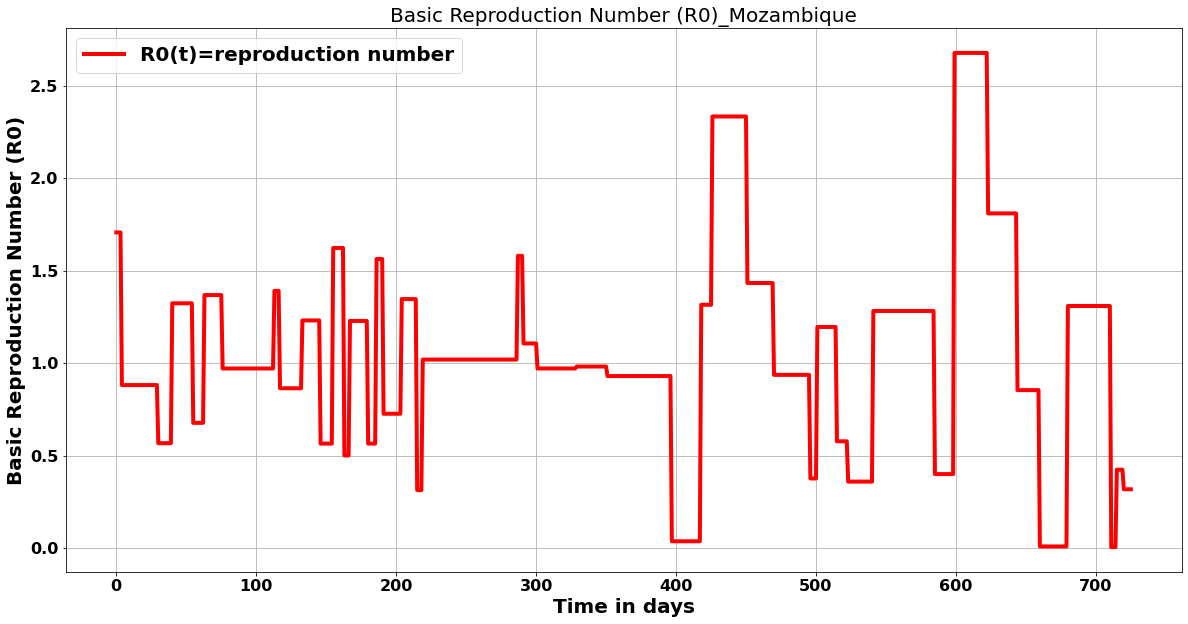

In [ ]:

    

alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black',color='r',label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately 
#plt.fill_between(t ,R0-dR0st,R0+dR0st,color='r',alpha=alpha,label='Statistical Uncertainty Without R0')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)_Mozambique',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.savefig("Basic Reproduction Number (R0)_Moz", dpi=300, bbox_inches='tight')



In [ ]:
alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-dR0st,R0+dR0st,color='r',alpha=alpha,label='Statistical Uncertainty  ')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)_Mozambique ',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
#plt.savefig("Statistical Uncertainty (R0)_Moz", dpi=300, bbox_inches='tight')
#plt.savefig("Statistical Uncertainty for (R0)_Moz", dpi=300, bbox_inches='tight')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-87-08cdbf2a5456>", line 25, in <module>
    plt.savefig("Statistical Uncertainty for (R0)_Moz", dpi=300, bbox_inches='tight')
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py", line 723, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/figure.py", line 2203, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/backend_bases.py", line 2126, in print_figure
    **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py", line 535, in print_png
    with cbook.open_file_cm(filename_or_obj, "wb") as fh:
  File "/usr/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/usr/l

OSError: ignored

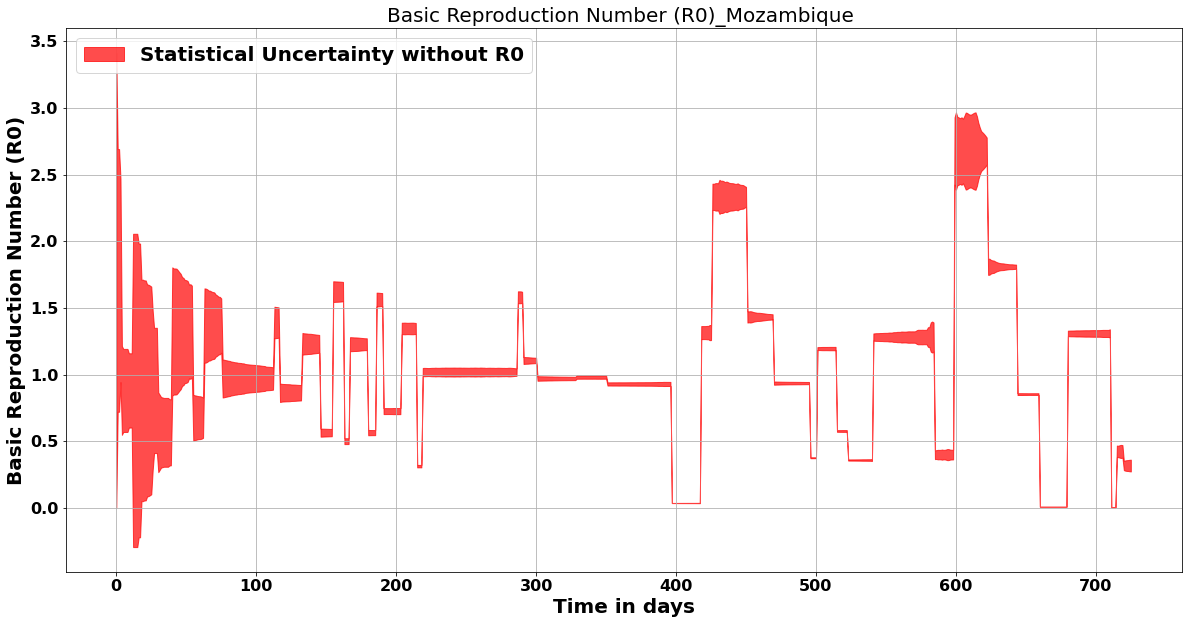

In [ ]:
alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

#plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-dR0st,R0+dR0st,color='r',alpha=alpha,label='Statistical Uncertainty without R0')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)_Mozambique ',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
#plt.savefig("Statistical Uncertainty (R0)_Moz", dpi=300, bbox_inches='tight')
plt.savefig("Statistical Uncertainty for (R0)_Moz", dpi=300, bbox_inches='tight')

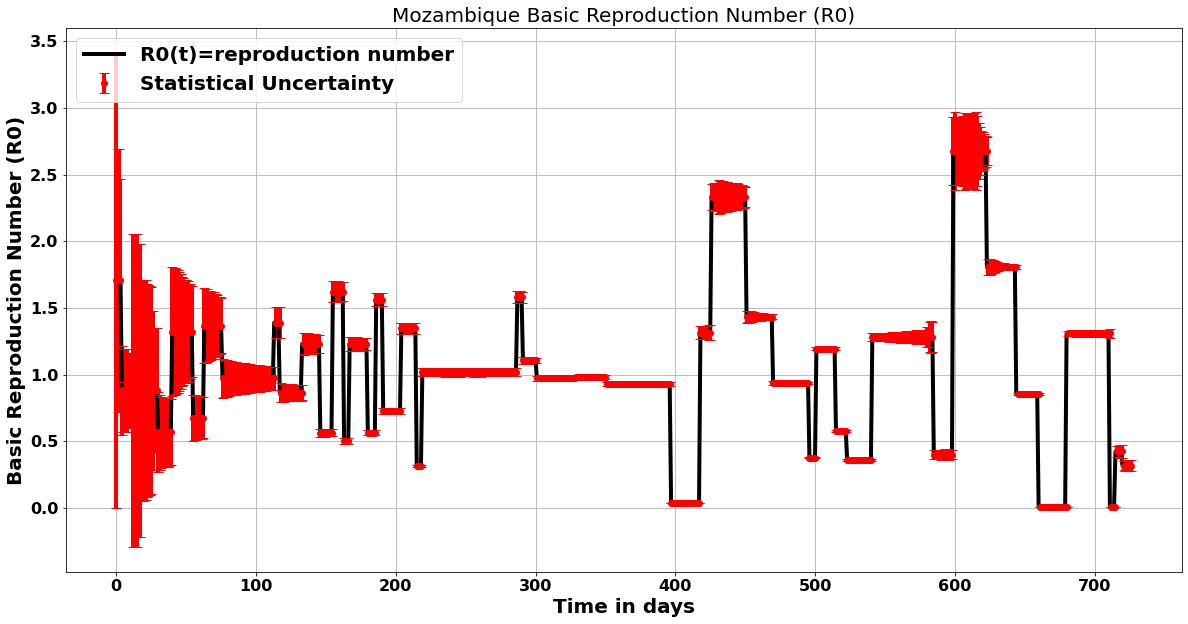

In [ ]:
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately 

plt.errorbar(data_time ,R0,dR0st,fmt='o',color='r',label='Statistical Uncertainty',elinewidth=4,capsize=5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Mozambique Basic Reproduction Number (R0)',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.show()


In [ ]:
alpha=interp1d(t,alpha2,bounds_error=False, fill_value="extrapolate")
beta=interp1d(t,beta2,bounds_error=False, fill_value="extrapolate")
delta=interp1d(t,delta2,bounds_error=False, fill_value="extrapolate")
gamma=interp1d(t,gamma2,bounds_error=False, fill_value="extrapolate")
epsilon=interp1d(t,epsilon2,bounds_error=False, fill_value="extrapolate")
zeta=interp1d(t,zeta2,bounds_error=False, fill_value="extrapolate")
lamda=interp1d(t,lamda2,bounds_error=False, fill_value="extrapolate")
eta=interp1d(t,eta2,bounds_error=False, fill_value="extrapolate")
rho=interp1d(t,rho2,bounds_error=False, fill_value="extrapolate")
theta=interp1d(t,theta2,bounds_error=False, fill_value="extrapolate")
mu=interp1d(t,mu2,bounds_error=False, fill_value="extrapolate")
kappa=interp1d(t,kappa2,bounds_error=False, fill_value="extrapolate")
nu=interp1d(t,nu2,bounds_error=False, fill_value="extrapolate")
chi=interp1d(t,chi2,bounds_error=False, fill_value="extrapolate")
sigma=interp1d(t,sigma2,bounds_error=False, fill_value="extrapolate")
tau_b=interp1d(t,tau_b2,bounds_error=False, fill_value="extrapolate")
tau_a=interp1d(t,tau_a2,bounds_error=False, fill_value="extrapolate")
phi=interp1d(t,phi2,bounds_error=False, fill_value="extrapolate")
alpha_p=interp1d(t,alpha_p2,bounds_error=False, fill_value="extrapolate")




In [ ]:
def SIDARTHEV_model(y, t,N, alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,tau_b,tau_a,phi,alpha_p):
    S = y[0]   #Succeptible
    I = y[1]   #Infected asymptomatic undetected
    D = y[2]   #Diagnosed asymptomatic infected detected
    A = y[3]   #Ailing symptomatic infected undetected
    R = y[4]   # Recognised symptomatic infected detected
    T = y[5]   #Treathened accutely symptomatic infected detected
    H = y[6]   # Healed
    E = y[7]   # Extinct (deads)
    V = y[8]
    U = y[9]
    return [-S*(alpha(t)*I + beta(t)*D +gamma(t)*A + delta(t)*R) - phi(t)*S,
            S*(alpha(t)*I + beta(t)*D +gamma(t)*A + delta(t)*R) + alpha_p(t)*I*V-(epsilon(t)+lamda(t)+zeta(t))*I,
            epsilon(t)*I-(eta(t)+rho(t))*D,
            zeta(t)*I-(theta(t)+mu(t)+kappa(t))*A,
            eta(t)*D +theta(t)*A-(tau_a(t) + nu(t) + chi(t))*R,
            mu(t)*A+nu(t)*R-(sigma(t)+tau_b(t))*T,
            lamda(t)*I +rho(t)*D + kappa(t)*A  + sigma(t)*T +chi(t)*R,
            tau_a(t)*R + tau_b(t)*T,
            - alpha_p(t)*I*V + phi(t)*S,
            lamda(t)*I]





In [ ]:
N=2.9e7

#itemp[0] = 0.0/population;
#   dtemp[0] = 1.0/population;
 #  atemp[0] = 0.25/population;
  # rtemp[0] = 1.0/population;
 #  ttemp[0] = 0.0;
 #  htemp[0] = 0.0;
 #  etemp[0] = 0.0;
#   stemp[0] = 1.0-itemp[0]-dtemp[0]-atemp[0]-rtemp[0]-ttemp[0]-htemp[0]-etemp[0];


I0=  0.0/N#20./N
D0=  1/N     #9./N
A0=  0.25/N       #1./N
R0= 1/N            #2./N
T0=0.00
H0=0.00
E0=0.00
V0=0.00
S0=1-I0-D0-A0-R0-T0-H0-E0-V0
U0=0.00
y0 = S0,I0,D0,A0,R0,T0,H0,E0,V0,U0

#time (days)
#t = np.linspace(0, 67, 67)

# Integrate the SIR equations over the time grid, t.
ret = odeint(SIDARTHEV_model, y0, t, args=(N, alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,tau_b,tau_a,alpha_p,phi))
S,I,D,A,R,T,H,E,V,U= ret.T
len(S)


726

In [ ]:
actif_sidarthe=[]
t=[]
for i in range(len(data_time)):
    t.append(i)
    actif_sidarthe.append(A[i]+T[i]+R[i])
len(t)      

726

In [ ]:
Infected_sidarthe=[]
t=[]
for i in range(len(data_time)):
    t.append(i)
    Infected_sidarthe.append(A[i]+T[i]+R[i]+H[i]+E[i])
len(t) 

726

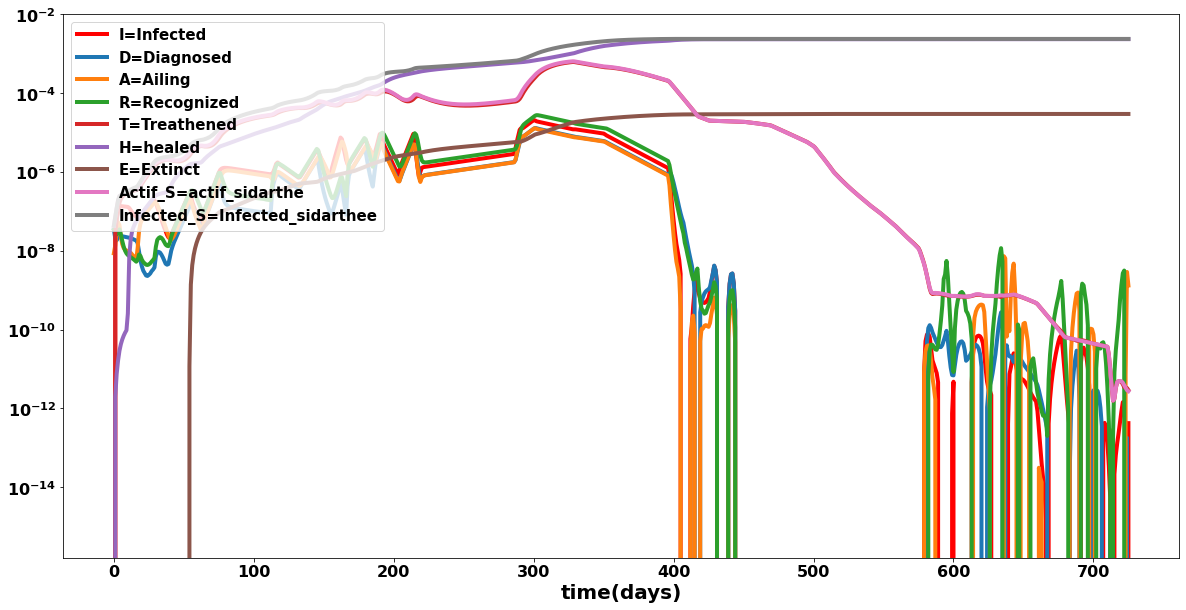

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-94-cf7b826be9cf>", line 24, in <module>
    fig.savefig('SIDARTHE_model_variousR024052020.pdf')
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/figure.py", line 2203, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/backend_bases.py", line 2126, in print_figure
    **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_pdf.py", line 2541, in print_pdf
    file = PdfFile(filename, metadata=metadata)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_pdf.py", line 459, in __init__
    fh, opened = cbook.to_filehandle(filename, "wb", return_opened=True)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 403, in to_fi

OSError: ignored

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)

plt.yscale('log')
#plt.plot(t, S, label='S=Succeptible',linewidth=4) # plotting t, a separately
plt.plot(t, I, 'r',label='I=Infected',linewidth=4) # plotting t, a separately 
plt.plot(t, D,label='D=Diagnosed',linewidth=4) # plotting t, b separately 
plt.plot(t, A,label='A=Ailing',linewidth=4) # plotting t, c separately 
plt.plot(t, R, label='R=Recognized',linewidth=4) # plotting t, a separately 
plt.plot(t, T, label='T=Treathened',linewidth=4) # plotting t, a separately 
plt.plot(t, H,label='H=healed',linewidth=4) # plotting t, b separately 
plt.plot(t, E,label='E=Extinct',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,label='Actif_S=actif_sidarthe',linewidth=4) # plotting t, c separately 
plt.plot(t, Infected_sidarthe,label='Infected_S=Infected_sidarthee',linewidth=4)
         
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('SIDARTHE_model based on covid19 Mozambican data with varied R0',fontsize=30)
plt.xlabel("time(days)",fontsize=20)
ax.legend(loc=2, prop={'size': 15})
#plt.xscale("log")
#plt.yscale("log")
plt.show()
fig.savefig('SIDARTHE_model_variousR024052020.pdf')
len(I)


In [ ]:
N=2.9e7
dR0syst=R0*((U)/(H))*N


DR0= np.sqrt((dR0st*dR0st)+(dR0syst*dR0syst))


In [ ]:



par=0.57,0.0114,0.0114,0.456,0.171,0.1254,0.0342,0.1254, 0.0342, 0.3705,0.0171,0.0171,0.0274,0.0171,0.0171, 0.1605,0.00,0.00,0.00
R0=[]
parm=[]
t1=[]
for i in range(len(data_time)):
   # print(rzero(t,par))
    R0.append( rzero(i,par)[0])
    parm.append( rzero(i,par)[1])
    t1.append(i)
#print(R0)
#print(parm)
t= np.array(t1, dtype=float)
#print(t)
#t2 = np.linspace(0, 85, 86)
parm[0]
par1= np.array(parm, dtype=float)






plt.rcParams["font.weight"] #= \"bold\"
plt.rcParams["axes.labelweight"] #= \"bold\"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
# Plotting The reproduction number


fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=2) # plotting t, c separately 
#plt.plot(t,dR0syst,'r', label='R0(t)=reproduction number',linewidth=2)
plt.errorbar(t ,R0,dR0syst, fmt='o',color='r',label='Systematic Uncertainty',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(' Basic Reproduction Number (R0) ',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
#plt.show()
plt.savefig("Kenya_R(0).pdf")





ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-95-4f19e671b3d0>", line 13, in <module>
    plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=2) # plotting t, c separately
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py", line 2763, in plot
    is not None else {}), **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py", line 1647, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py", line 216, in __call__
    yield from self._plot_args(this, kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py", line 342, in _plot_args
    raise ValueError(f"x and y must have same first dimension, but "
ValueError: x and y must have same first dimension, but h

ValueError: ignored

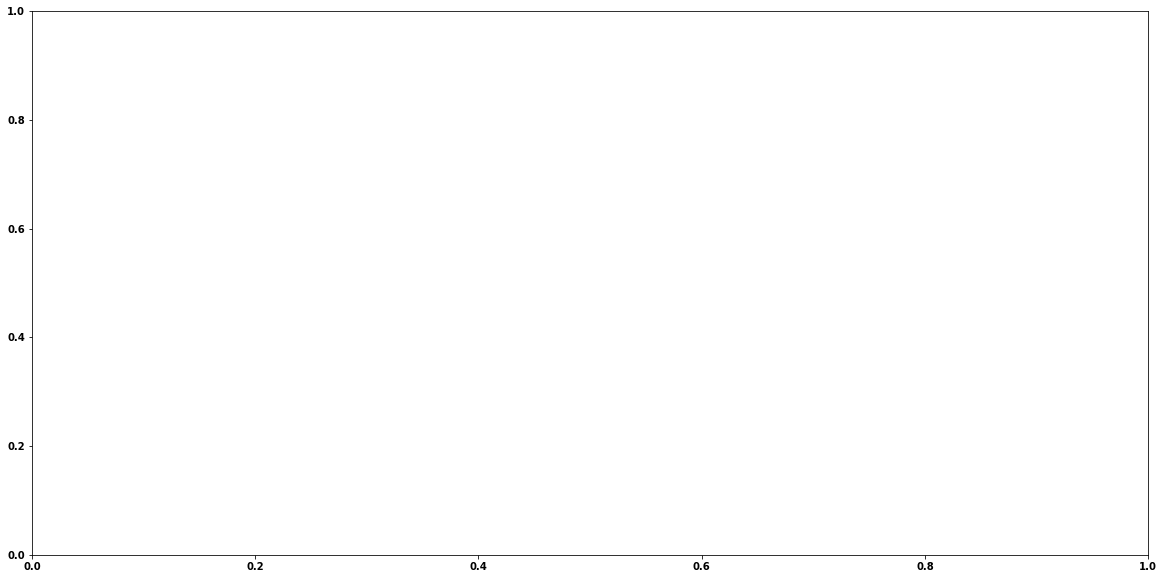

In [ ]:
plt.rcParams["font.weight"] #= \"bold\"
plt.rcParams["axes.labelweight"] #= \"bold\"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
# Plotting The reproduction number


fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=2) # plotting t, c separately 
#plt.plot(t,dR0syst,'r', label='R0(t)=reproduction number',linewidth=2)
plt.errorbar(t ,R0,dR0syst, fmt='o',color='r',label='Systematic Uncertainty',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(' Basic Reproduction Number (R0) ',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid()#!/usr/bin/env python
# coding: utf-8

# In[1]:




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-96-8811807520c0>", line 13, in <module>
    plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py", line 2763, in plot
    is not None else {}), **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py", line 1647, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py", line 216, in __call__
    yield from self._plot_args(this, kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py", line 342, in _plot_args
    raise ValueError(f"x and y must have same first dimension, but "
ValueError: x and y must have same first dimension, but h

ValueError: ignored

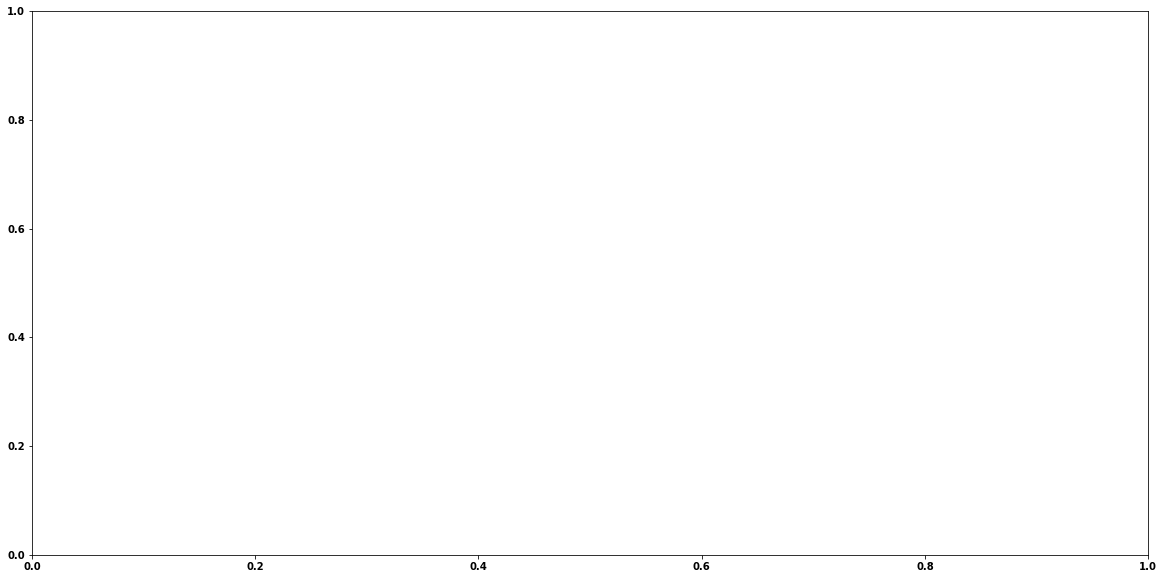

In [ ]:
alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-dR0syst,R0+dR0syst,color='r',alpha=alpha,label='Systematic Uncertainty ')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)_Mozambique',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.savefig("Systematic Uncertainty with (R0)_Moz", dpi=300, bbox_inches='tight')

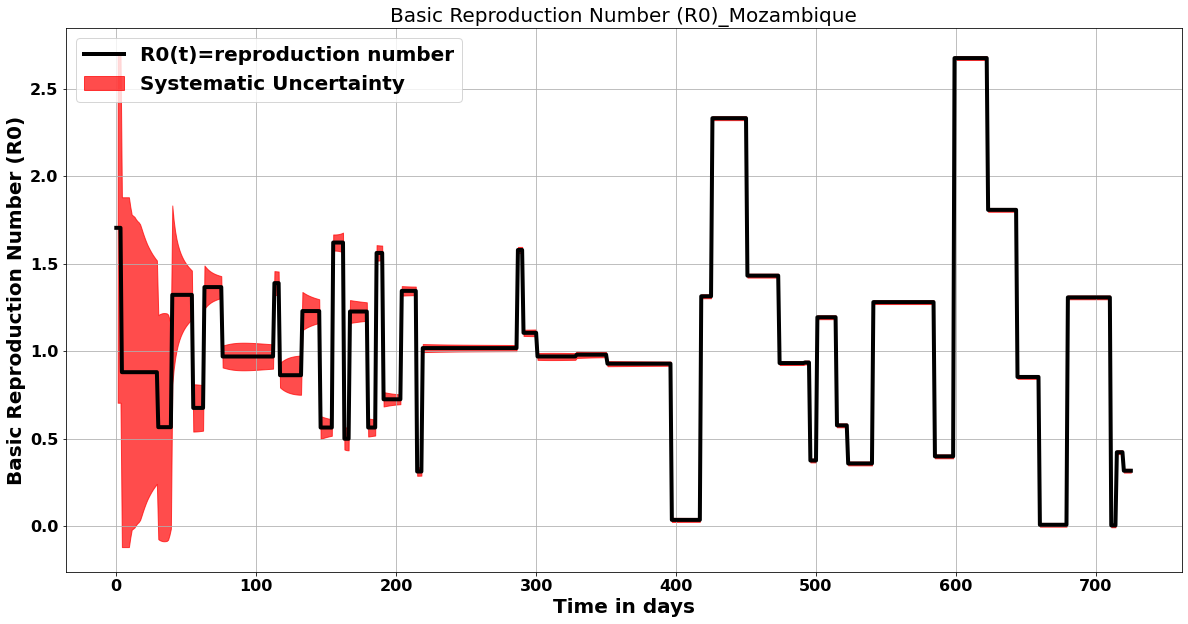

In [ ]:
alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-dR0syst,R0+dR0syst,color='r',alpha=alpha,label='Systematic Uncertainty')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)_Mozambique',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.savefig("Systematic Uncertainty (R0)_Moz", dpi=300, bbox_inches='tight')



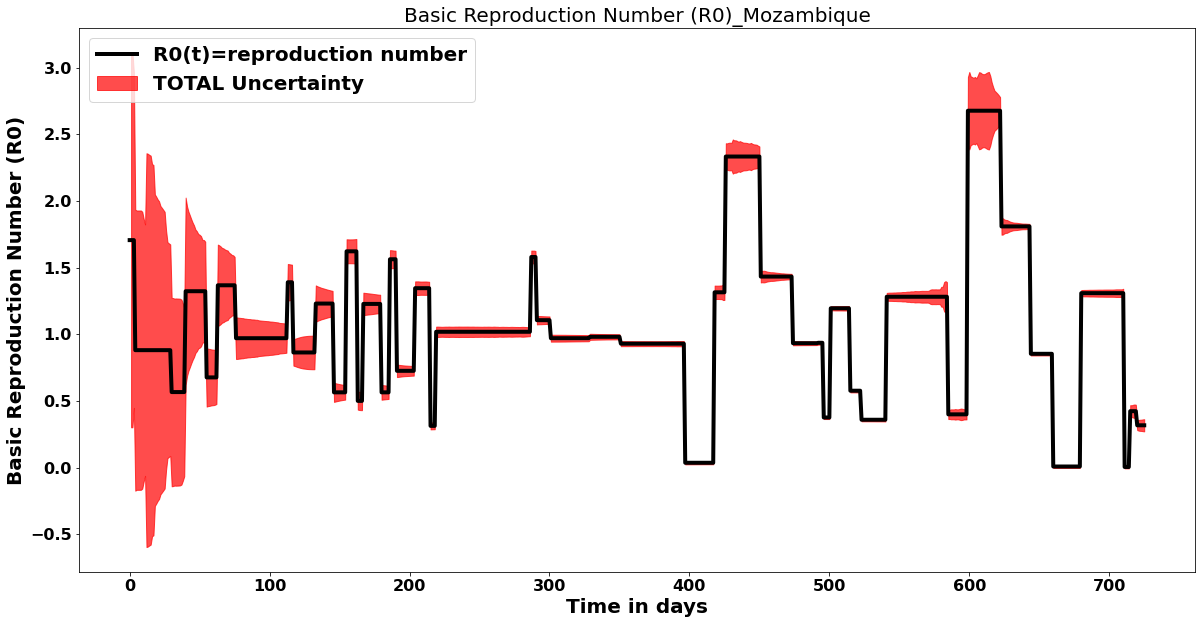

In [ ]:
alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-DR0,R0+DR0,color='r',alpha=alpha,label='TOTAL Uncertainty ')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)_Mozambique',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(False)
plt.savefig("TOTAL Uncertainty_Moz", dpi=300, bbox_inches='tight')


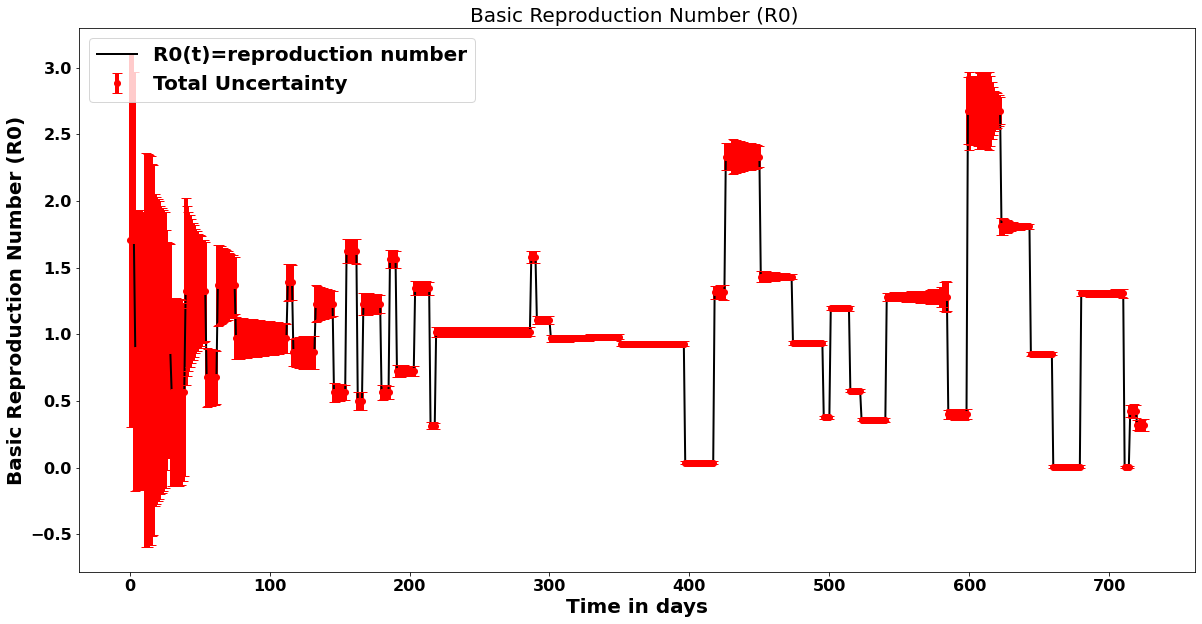

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=2) # plotting t, c separately 
#plt.plot(t,dR0syst,'r', label='R0(t)=reproduction number',linewidth=2)
plt.errorbar(t ,R0,DR0, fmt='o',color='r',label='Total Uncertainty',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0) ',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
#plt.grid(False)
#plt.show()
plt.savefig("Mozambique_R(0).pdf")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()


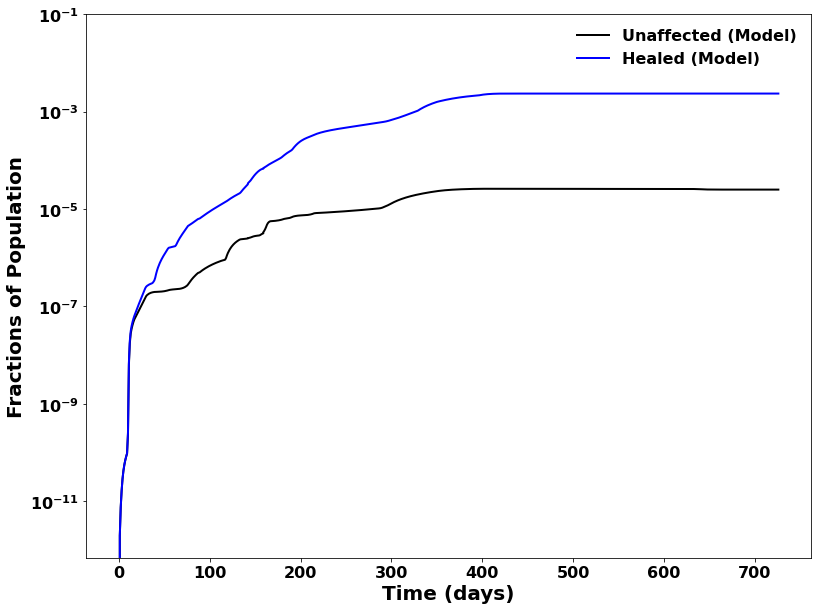

In [ ]:
fig = plt.figure(figsize=(13,10))
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
#plt.plot(data_time ,Unaffected,'black', label='Unaffected and Healed',linewidth=2)
plt.plot(data_time ,U,'black', label='Unaffected (Model)',linewidth=2)
plt.plot(data_time ,H,'b', label='Healed (Model)',linewidth=2)
# plotting t, c separately 
#plt.plo
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Unaffected_Mozambique',fontsize=20)
plt.xlabel("Time (days)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
plt.ylabel("Fractions of Population",fontsize=20)
plt.yscale("log")
plt.ylim(0, 10**-1)
#plt.grid()
#plt.grid()
plt.legend(frameon=False, fontsize=16)
plt.savefig("Unaffected and Heald_Moz", dpi=300, bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


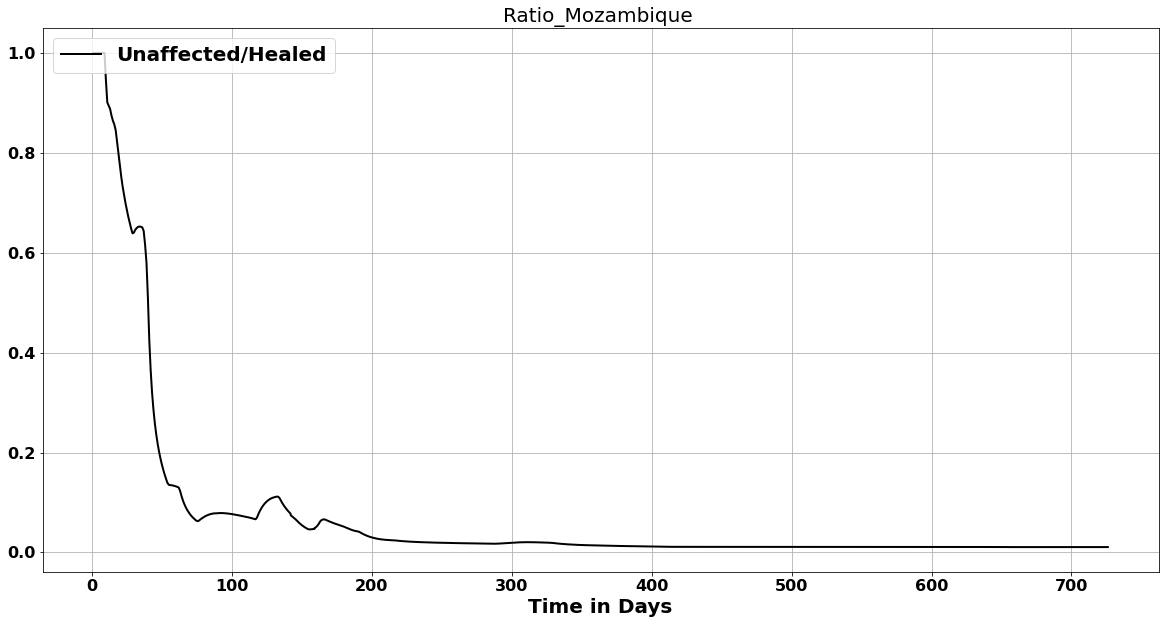

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
plt.plot(data_time ,U/H,'black', label='Unaffected/Healed',linewidth=2)

# plotting t, c separately 
#plt.plo
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Ratio_Mozambique ',fontsize=20)
plt.xlabel("Time in Days",fontsize=20)
ax.legend(loc=2, prop={'size': 20})

#plt.yscale("log")
plt.grid()
plt.savefig("Ratio_Moz", dpi=300, bbox_inches='tight')

## 

In [ ]:
#To see how to plot with error bars, go here: https://www.youtube.com/watch?v=xhizVO9SPjU
error_infectedf=((np.sqrt((data_infected)))/N)
error_dead=((np.sqrt((data_dead)))/N)
error_actif=((np.sqrt((data_active)))/N)
error_recovered=((np.sqrt((data_recovered)))/N)


print(len(error_infectedf))
print(len(error_dead))
print(len(error_actif))
print(len(error_recovered))


726
726
726
726


In [ ]:
#To see how to plot with error bars, go here: https://www.youtube.com/watch?v=xhizVO9SPjU
error_vaccinated=((np.sqrt((dados['vaccinated'])))/N)
error_cumulative_completely_dosage=((np.sqrt((dados['cumulative_completely_dosage'])))/N)
error_Booster=((np.sqrt((dados['Booster'])))/N)

print(len(dados['Booster']))
print(len(dados['vaccinated']))
print(len(dados['Fration_cumulative_completely_dosage']))

726
726
726


In [ ]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

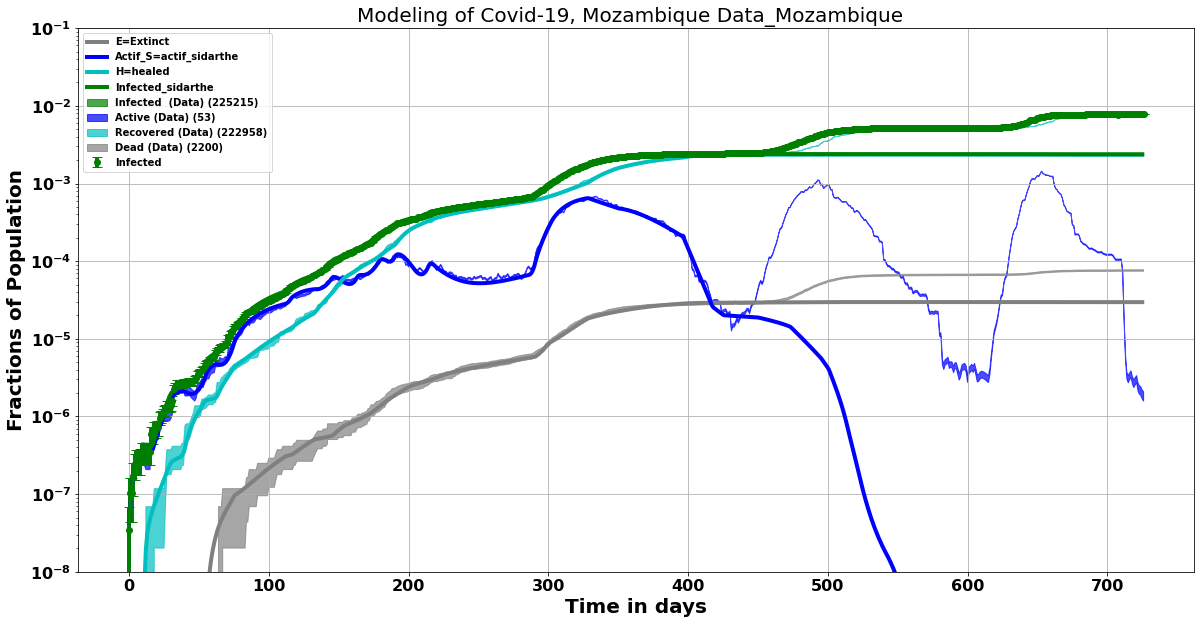

In [ ]:
alpha=0.7
plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.fill_between(data_time ,Dinfecteds-error_infectedf,Dinfecteds+error_infectedf,color='g',alpha=alpha,label='Infected  (Data) (' +str((data_infected[-1]))+')')
plt.fill_between(data_time ,Dactifs-error_actif,Dactifs+error_actif,color='b',alpha=alpha,label='Active (Data) (' +str((data_active[-1]))+')')
plt.fill_between(data_time ,Drecovereds-error_recovered,Drecovereds+error_recovered,color='c',alpha=alpha,label='Recovered (Data) (' +str((data_recovered[-1]))+')')
plt.fill_between(data_time ,Ddeads-error_dead,Ddeads+error_dead,color='gray',alpha=alpha,label='Dead (Data) (' +str((data_dead[-1]))+')')

plt.plot(t, E,'gray',label='E=Extinct',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=4) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed',linewidth=4) # plotting t, b separately 
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=4)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)

plt.title('Modeling of Covid-19, Mozambique Data_Mozambique  ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

plt.yscale('log')
plt.ylim(10**-8, 10**-1)
plt.grid(True)
#plt.ylim(0, 2*10**-4)

plt.savefig("Mozambique Vaccination (Data, code) ", dpi=300, bbox_inches='tight')


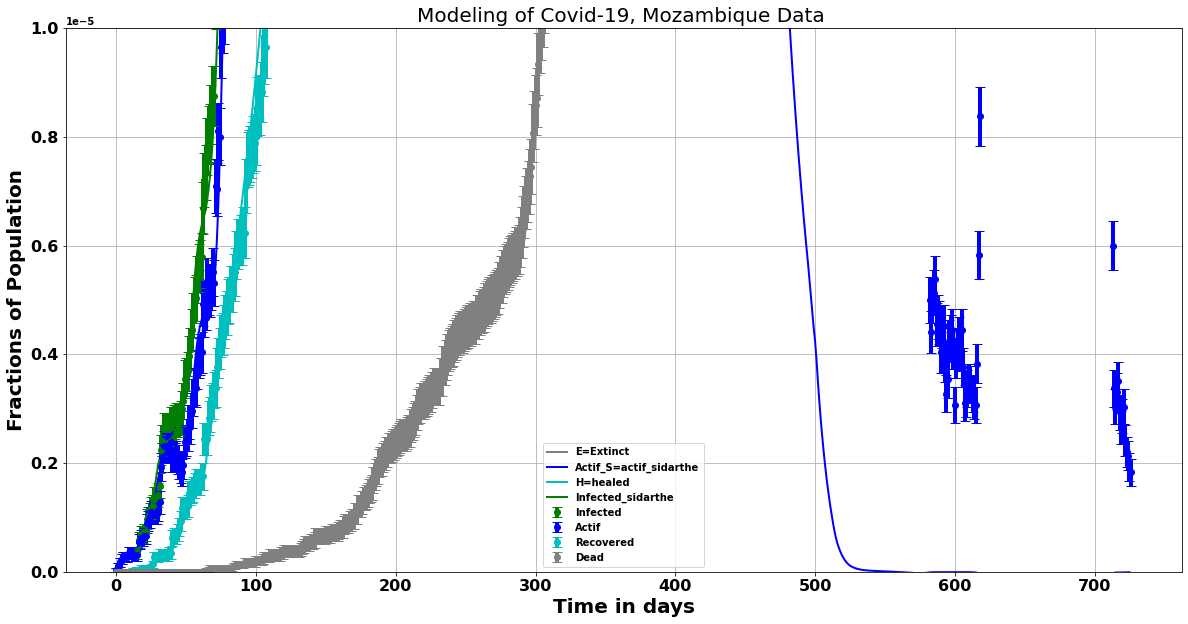

In [ ]:
fig = plt.figure()
#ax = plt.subplot(111)



#plt.semilogy(ax1.text(0.5,0.5,'left', color='r',fontsize=18, ha='center')'o',label='Infecteds',linewidth=6,color='g')
#plt.semilogy(data_time ,Dactifs,'o',label='Actifs',linewidth=6,color='b')
#plt.semilogy(data_time ,Drecovereds,'o',label='Recovered',linewidth=6,color='c')
#plt.semilogy(data_time ,Ddeads,'o',label='Dead',linewidth=6,color='gray')


plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actif',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)

plt.plot(t, E,'gray',label='E=Extinct',linewidth=2) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=2) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed',linewidth=2) # plotting t, b separately 
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=2)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)
plt.title('Modeling of Covid-19, Mozambique Data ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.ylim(0, 1*10**-5)

fig.savefig('SIDARTHE_model_fitting.pdf')

In [ ]:
dados['cumulative_completely_dosage'].iloc[-1] 



nan

In [ ]:
t1 = data_time[500:512]
t2 = data_time[525:539]
t3 = data_time[562:-1]

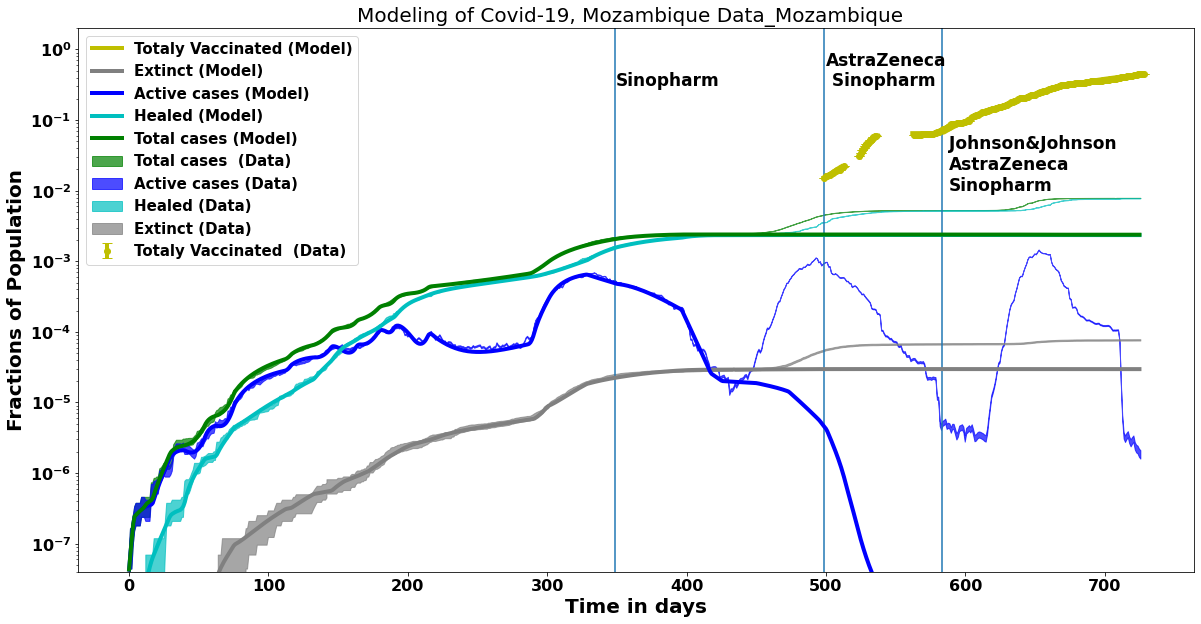

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)


#plt.semilogy(data_time ,Dinfecteds,'o',label='Infecteds',linewidth=6,color='g')
#plt.semilogy(data_time ,Dactifs,'o',label='Actifs',linewidth=6,color='b')
#plt.semilogy(data_time ,Drecovereds,'o',label='Recovered',linewidth=6,color='c')
#plt.semilogy(data_time ,Ddeads,'o',label='Dead',linewidth=6,color='gray')

alpha=0.7
plt.fill_between(data_time ,Dinfecteds-error_infectedf,Dinfecteds+error_infectedf,color='g',alpha=alpha,label='Total cases  (Data)')
plt.fill_between(data_time ,Dactifs-error_actif,Dactifs+error_actif,color='b',alpha=alpha,label='Active cases (Data)')
plt.fill_between(data_time ,Drecovereds-error_recovered,Drecovereds+error_recovered,color='c',alpha=alpha,label='Healed (Data)')
plt.fill_between(data_time ,Ddeads-error_dead,Ddeads+error_dead,color='gray',alpha=alpha,label='Extinct (Data)')

#plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected (Data) (' +str((data_infected[-1]))+')',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Active  (Data) (' +str((data_active[-1]))+')',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered  (Data) (' +str((data_recovered[-1]))+')',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead  (Data) (' +str((data_dead[-1]))+')',elinewidth=4,capsize=5)

#plt.fill_between(dados['Days1'] ,(dados['Fration_vaccinated'])-error_vaccinated,(dados['Fration_vaccinated'])+error_vaccinated,color='red',alpha=alpha,label=' Vaccinated  (Data) ')
#plt.fill_between(dados['Days1'] ,dados['Fration_cumulative_completely_dosage']-error_cumulative_completely_dosage,dados['Fration_cumulative_completely_dosage']+error_cumulative_completely_dosage,color='y',alpha=alpha,label='Totaly Vaccinated  (Data) ')
plt.plot(t1, V[t1],'y',label='Totaly Vaccinated (Model)',linewidth=4) # plotting t, b separately 
plt.plot(t2, V[t2],'y',linewidth=4)
plt.plot(t3, V[t3],'y',linewidth=4)
#plt.errorbar(dados['Days1'] ,dados['Fration_vaccinated'],yerr=error_vaccinated,fmt='o', color='red',label='Vaccinated  (Data) (' +str((dados['vaccinated'].iloc[194] ))+')',elinewidth=4,capsize=5)
plt.errorbar(dados['Days1'],dados['Fration_cumulative_completely_dosage'],yerr=error_cumulative_completely_dosage,fmt='o', color='y',label='Totaly Vaccinated  (Data)',elinewidth=4,capsize=5)
#plt.errorbar(dados['Days1'],dados['Booster_Ration'],yerr=error_Booster,fmt='o', color='violet',label='Vaccinated_Booster (Data)   (' +str((dados['Booster'].iloc[194] ))+')',elinewidth=4,capsize=5)

#plt.plot(dados['Days1'],(dados['Fration_vaccinated']),"*",color='r',label=' Vaccinated  (Data) ')
#plt.plot(dados['Days1'],(dados['Fration_cumulative_completely_dosage']),"*",color='y',label='Totaly Vaccinated  (Data) ')
plt.axvline(349)
plt.axvline(499)
plt.axvline(583)


plt.plot(t, E,'gray',label='Extinct (Model)',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Active cases (Model)',linewidth=4) # plotting t, c separately
plt.plot(t, H,'c',label='Healed (Model)',linewidth=4) # plotting t, b separately 
plt.plot(t, Infected_sidarthe, 'g',label='Total cases (Model)',linewidth=4)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)


plt.title('Modeling of Covid-19, Mozambique Data_Mozambique  ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

plt.yscale('log')
plt.ylim(10**-8, 10**-0)
plt.grid(True)
#plt.ylim(0, 2*10**-4)


#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 20
#fig_size[1] = 10
#plt.rcParams["figure.figsize"] = fig_size
#fig = plt.figure()
#ax = plt.subplot(111)



plt.yscale('log')
#plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)
#plt.xlabel("Time in days",fontsize=18)
#plt.ylabel("Fractions of Population Vaccinated",fontsize=18)
plt.text(349, 0.3, 'Sinopharm', fontsize=17)
plt.text(500, 0.3, 'AstraZeneca\n Sinopharm', fontsize=17)
plt.text(588, 0.01, 'Johnson&Johnson\nAstraZeneca\nSinopharm', fontsize=17)
#plt.title("Mozambique vaccination",fontsize=25)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-3, 10**0)

plt.grid(False)
plt.ylim(4*10**-8, 2*10**0)

plt.savefig("Mozambique Vaccination (Data, code and vacination) ", dpi=300, bbox_inches='tight')

#len(Dinfecteds)






#fig.savefig('SIDARTHE_model_fitting.pdf')




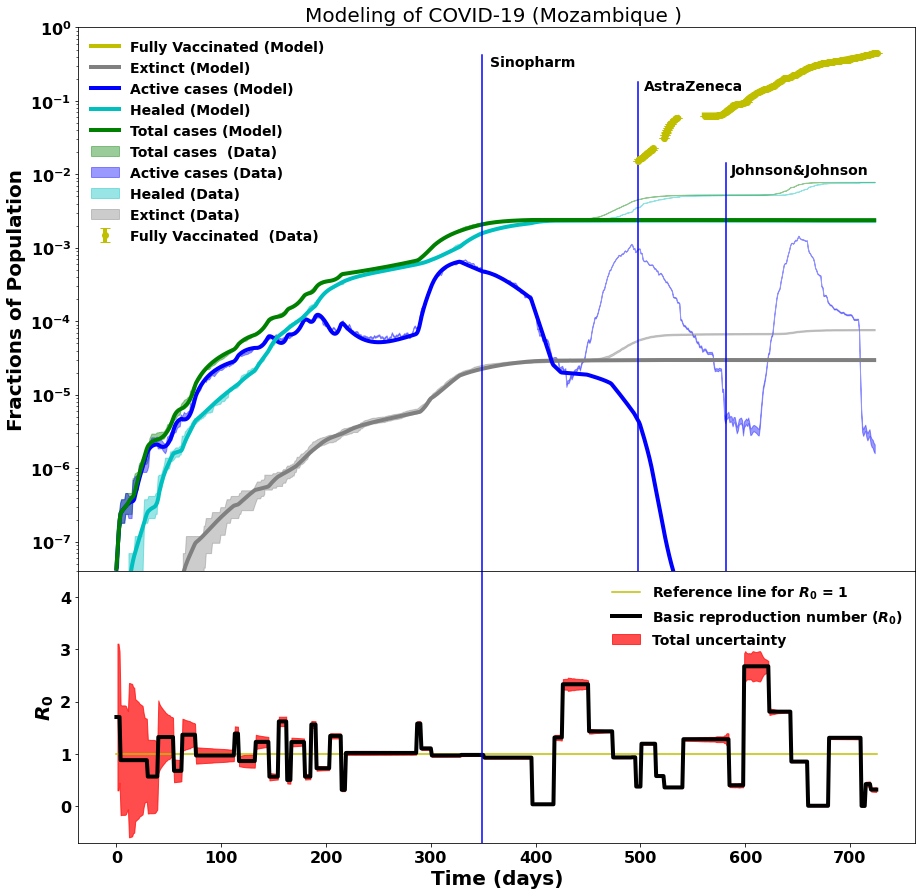

In [ ]:
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])

ax0=plt.subplot(gs[0])
ax0.set_yscale('log')

alpha=.4
width = 4

# fig = plt.figure(figsize=(15,15))
# gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
# ax0=plt.subplot(gs[0])
# ax0.set_yscale('log')

#plt.semilogy(data_time ,Dinfecteds,'o',label='Infecteds',linewidth=6,color='g')
#plt.semilogy(data_time ,Dactifs,'o',label='Actifs',linewidth=6,color='b')
#plt.semilogy(data_time ,Drecovereds,'o',label='Recovered',linewidth=6,color='c')
#plt.semilogy(data_time ,Ddeads,'o',label='Dead',linewidth=6,color='gray')


#plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected  (Data) (' +str((data_infected[-1]))+')',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Active (Data) (' +str((data_active[-1]))+')',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered (Data) (' +str((data_recovered[-1]))+')',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead (Data) (' +str((data_dead[-1]))+')',elinewidth=4,capsize=5)
plt.fill_between(data_time ,Dinfecteds-error_infectedf,Dinfecteds+error_infectedf,color='g',alpha=alpha,label='Total cases  (Data)')
plt.fill_between(data_time ,Dactifs-error_actif,Dactifs+error_actif,color='b',alpha=alpha,label='Active cases (Data)')
plt.fill_between(data_time ,Drecovereds-error_recovered,Drecovereds+error_recovered,color='c',alpha=alpha,label='Healed (Data)')
plt.fill_between(data_time ,Ddeads-error_dead,Ddeads+error_dead,color='gray',alpha=alpha,label='Extinct (Data)')

#plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected (Data) (' +str((data_infected[-1]))+')',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Active  (Data) (' +str((data_active[-1]))+')',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered  (Data) (' +str((data_recovered[-1]))+')',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead  (Data) (' +str((data_dead[-1]))+')',elinewidth=4,capsize=5)

#plt.fill_between(dados['Days1'] ,(dados['Fration_vaccinated'])-error_vaccinated,(dados['Fration_vaccinated'])+error_vaccinated,color='red',alpha=alpha,label=' Vaccinated  (Data) ')
#plt.fill_between(dados['Days1'] ,dados['Fration_cumulative_completely_dosage']-error_cumulative_completely_dosage,dados['Fration_cumulative_completely_dosage']+error_cumulative_completely_dosage,color='y',alpha=alpha,label='Totaly Vaccinated  (Data) ')
plt.plot(t1, V[t1],'y',label='Fully Vaccinated (Model)',linewidth=4) # plotting t, b separately 
plt.plot(t2, V[t2],'y',linewidth=4)
plt.plot(t3, V[t3],'y',linewidth=4)
#plt.errorbar(dados['Days1'] ,dados['Fration_vaccinated'],yerr=error_vaccinated,fmt='o', color='red',label='Vaccinated  (Data) (' +str((dados['vaccinated'].iloc[194] ))+')',elinewidth=4,capsize=5)
plt.errorbar(dados['Days1'],dados['Fration_cumulative_completely_dosage'],yerr=error_cumulative_completely_dosage,fmt='o', color='y',label='Fully Vaccinated  (Data)',elinewidth=4,capsize=5)
#plt.errorbar(dados['Days1'],dados['Booster_Ration'],yerr=error_Booster,fmt='o', color='violet',label='Vaccinated_Booster (Data)   (' +str((dados['Booster'].iloc[194] ))+')',elinewidth=4,capsize=5)

#plt.errorbar(dados['Days1'] ,dados['Fration_vaccinated'],yerr=error_vaccinated,fmt='o', color='red',label='vaccinated',elinewidth=4,capsize=5)
#plt.errorbar(dados['Days1'],dados['Fration_cumulative_completely_dosage'],yerr=error_cumulative_completely_dosage,fmt='o', color='y',label='Totaly Vaccinated  (Data) ',elinewidth=4,capsize=5)
#plt.plot(dados['Days1'],(dados['Fration_vaccinated']),"*",color='r',label=' Vaccinated (Data) ')
#plt.plot(dados['Days1'],(dados['Fration_cumulative_completely_dosage']),"*",color='y',label='Totaly Vaccinated (Data) ')
# plt.axvline(349,c='b')
# plt.axvline(499,c='b')
# plt.axvline(583, ymax= .85,c='b')

plt.plot(t, E,'gray',label='Extinct (Model)',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Active cases (Model)',linewidth=4) # plotting t, c separately
plt.plot(t, H,'c',label='Healed (Model)',linewidth=4) # plotting t, b separately 
plt.plot(t, Infected_sidarthe, 'g',label='Total cases (Model)',linewidth=4)

plt.axvline(350, ymax= .95,c='b')
plt.axvline(499, ymax= .90,c='b')
plt.axvline(583, ymax= .75,c='b')
plt.text(357, 0.3, 'Sinopharm', fontsize=14)
plt.text(505, 0.14, 'AstraZeneca', fontsize=14)
plt.text(588, 0.0099, 'Johnson&Johnson', fontsize=14)
#plt.title("Mozambique vaccination",fontsize=25)
plt.legend()
# ax.legend(loc=2, prop={'size': 15})


#plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)

plt.title('Modeling of COVID-19 (Mozambique ) ',fontsize=20)
plt.legend()
#ax.legend(loc=2, prop={'size': 17})


plt.yscale('log')
plt.ylim(4*10**-8, 10**0)
#plt.grid(True)
#plt.ylim(0, 2*10**-4)
plt.legend(loc='upper left',prop={'size':14})
plt.savefig("Modeling of Covid-19,Mozambique", dpi=300, bbox_inches='tight')
plt.legend(frameon=False,fontsize=14)


ax1=plt.subplot(gs[1])



alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size



#plt.plot(t,R0,'black', label='Basic reproduction number ($R_{0}$)',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-DR0,R0+DR0,color='r',alpha=alpha,label='Total uncertainty')
plt.plot(data_time,Goodness,'y',label='Reference line for $R_0$ = 1 ' )
plt.plot(t,R0,'black', label='Basic reproduction number ($R_{0}$)',linewidth=4)
#plt.plot(data_time[: :10],Goodness[: :10],'y.-.',linewidth=4,label='Reference line for $R_0$ = 1 ')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Basic Reproduction Number (R0)_Cameroon ',fontsize=20)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel("$R_0$",fontsize=20)
plt.legend(loc='upper right',prop={'size':14})

plt.axvline(349,c='b')
plt.ylim(-0.7,4.5)
#plt.xscale("log")
#plt.yscale("log")
#plt.grid(True)
plt.subplots_adjust(hspace=.0)
plt.legend(frameon=False, fontsize=14)


plt.savefig("ModelingMOZ", dpi=300, bbox_inches='tight')




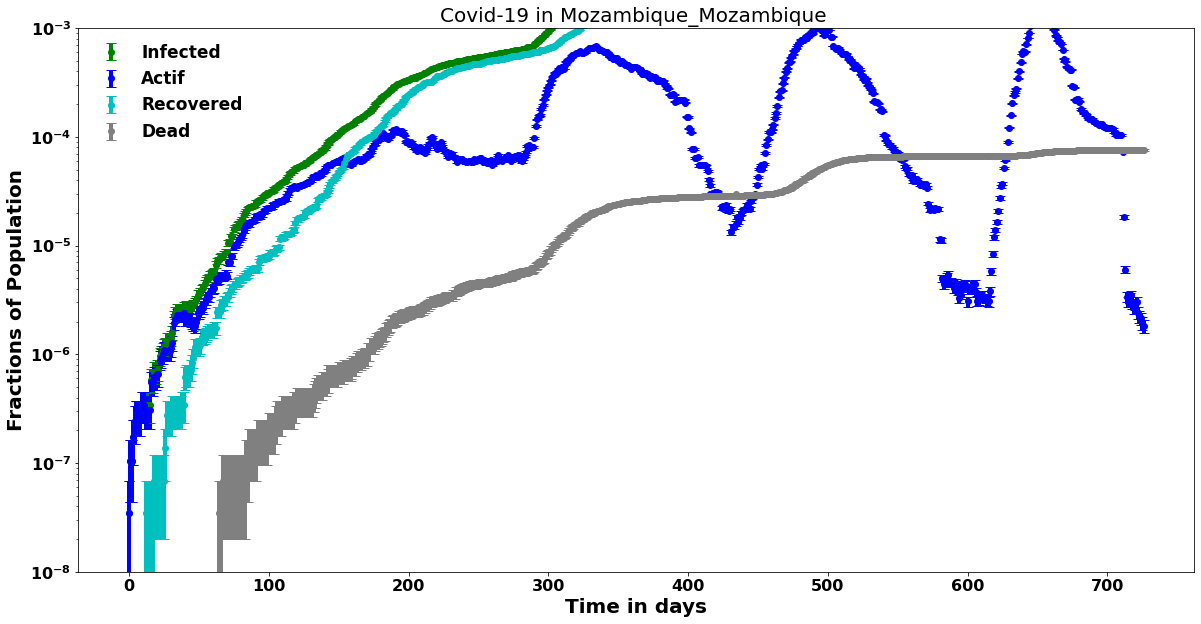

In [ ]:
fig = plt.figure()

ax = plt.subplot(111)


#plt.semilogy(data_time ,Dinfecteds,'o',label='Infecteds',linewidth=6,color='g')
#plt.semilogy(data_time ,Dactifs,'o',label='Actifs',linewidth=6,color='b')
#plt.semilogy(data_time ,Drecovereds,'o',label='Recovered',linewidth=6,color='c')
#plt.semilogy(data_time ,Ddeads,'o',label='Dead',linewidth=6,color='gray')

plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actif',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)

plt.title('Covid-19 in Mozambique_Mozambique ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

plt.yscale('log')
plt.ylim(10**-8, 10**-3)
plt.grid(False)
#plt.ylim(0, 2*10**-4)
plt.legend(frameon=False, fontsize=17)

fig.savefig('SIDARTHE_model_fitting.pdf')

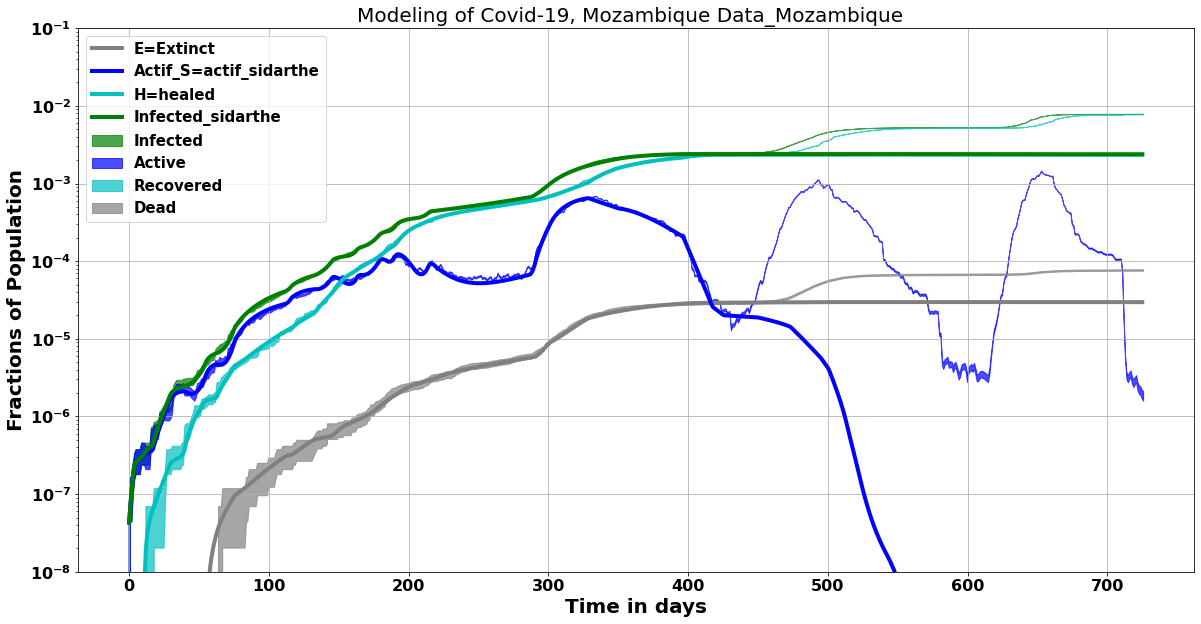

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)


#plt.semilogy(data_time ,Dinfecteds,'o',label='Infecteds',linewidth=6,color='g')
#plt.semilogy(data_time ,Dactifs,'o',label='Actifs',linewidth=6,color='b')
#plt.semilogy(data_time ,Drecovereds,'o',label='Recovered',linewidth=6,color='c')
#plt.semilogy(data_time ,Ddeads,'o',label='Dead',linewidth=6,color='gray')

alpha=0.7
#plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.fill_between(data_time ,Dinfecteds-error_infectedf,Dinfecteds+error_infectedf,color='g',alpha=alpha,label='Infected')
plt.fill_between(data_time ,Dactifs-error_actif,Dactifs+error_actif,color='b',alpha=alpha,label='Active')
plt.fill_between(data_time ,Drecovereds-error_recovered,Drecovereds+error_recovered,color='c',alpha=alpha,label='Recovered')
plt.fill_between(data_time ,Ddeads-error_dead,Ddeads+error_dead,color='gray',alpha=alpha,label='Dead')

plt.plot(t, E,'gray',label='E=Extinct',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=4) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed',linewidth=4) # plotting t, b separately 
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=4)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)

plt.title('Modeling of Covid-19, Mozambique Data_Mozambique  ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

plt.yscale('log')
plt.ylim(10**-8, 10**-1)
plt.grid(True)
#plt.ylim(0, 2*10**-4)

fig.savefig('SIDARTHE_model_fitting.pdf')


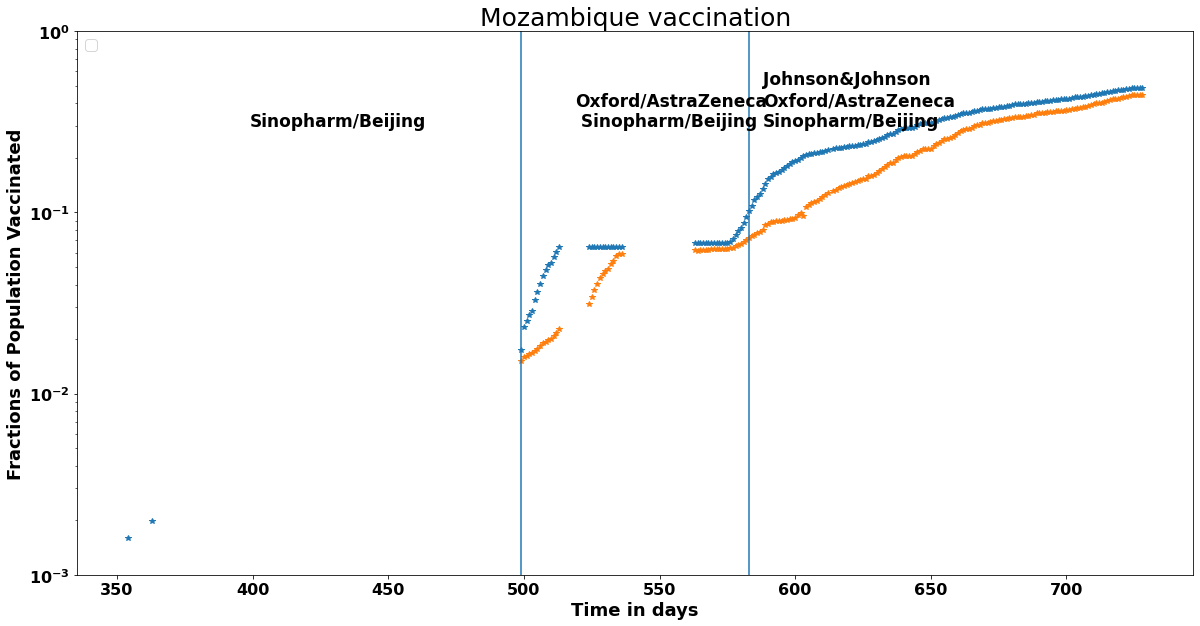

In [ ]:
#alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)

plt.plot(dados['Days1'],(dados['Fration_vaccinated']),"*")
plt.plot(dados['Days1'],(dados['Fration_cumulative_completely_dosage']),"*")
plt.axvline(499)
plt.axvline(583)



plt.yscale('log')


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=18)
plt.ylabel("Fractions of Population Vaccinated",fontsize=18)
plt.text(399, 0.3, 'Sinopharm/Beijing', fontsize=17)
plt.text(519, 0.3, 'Oxford/AstraZeneca\n Sinopharm/Beijing', fontsize=17)
plt.text(588, 0.3, 'Johnson&Johnson\nOxford/AstraZeneca\nSinopharm/Beijing', fontsize=17)
plt.title("Mozambique vaccination",fontsize=25)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
plt.ylim(10**-3, 10**0)

#plt.grid(True)
#plt.ylim(0, 2*10**-4)

plt.savefig("Mozambique Vaccination", dpi=300, bbox_inches='tight')


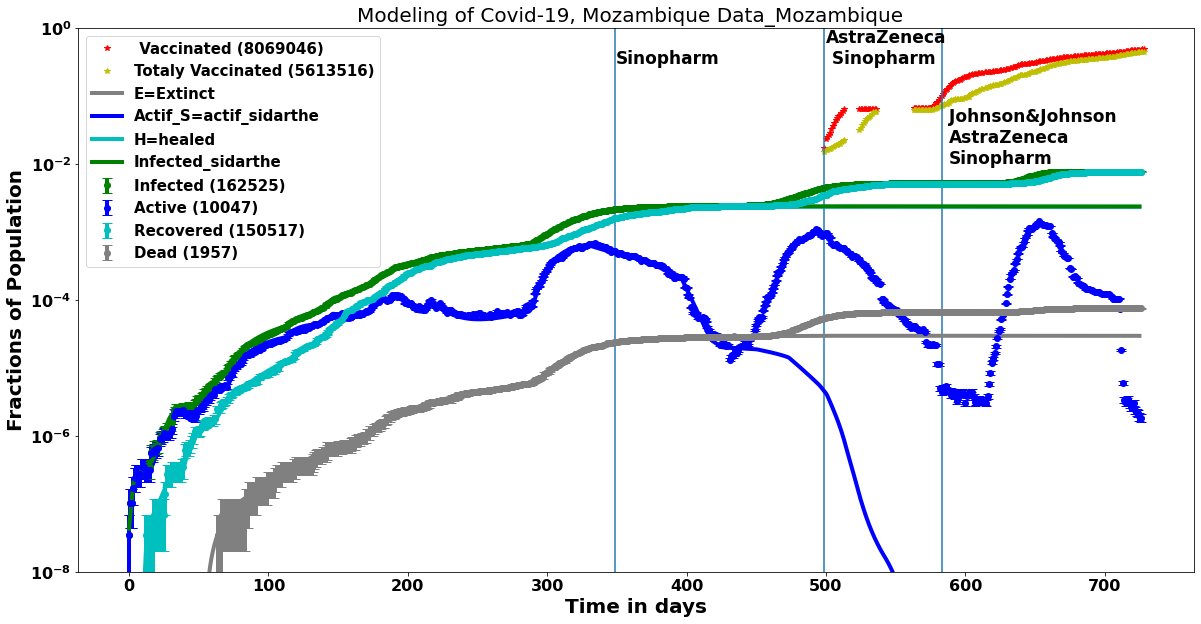

In [ ]:

fig = plt.figure()
ax = plt.subplot(111)


#plt.semilogy(data_time ,Dinfecteds,'o',label='Infecteds',linewidth=6,color='g')
#plt.semilogy(data_time ,Dactifs,'o',label='Actifs',linewidth=6,color='b')
#plt.semilogy(data_time ,Drecovereds,'o',label='Recovered',linewidth=6,color='c')
#plt.semilogy(data_time ,Ddeads,'o',label='Dead',linewidth=6,color='gray')

alpha=0.7
#plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected (162525)',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Active (10047)',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered (150517)',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead (1957)',elinewidth=4,capsize=5)
plt.plot(dados['Days1'],(dados['Fration_vaccinated']),"*",color='r',label=' Vaccinated (8069046)')
plt.plot(dados['Days1'],(dados['Fration_cumulative_completely_dosage']),"*",color='y',label='Totaly Vaccinated (5613516)')
plt.axvline(349)
plt.axvline(499)
plt.axvline(583)


plt.plot(t, E,'gray',label='E=Extinct',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=4) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed',linewidth=4) # plotting t, b separately 
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=4)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)

plt.title('Modeling of Covid-19, Mozambique Data_Mozambique  ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

plt.yscale('log')
plt.ylim(10**-8, 10**-0)
plt.grid(True)
#plt.ylim(0, 2*10**-4)


#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 20
#fig_size[1] = 10
#plt.rcParams["figure.figsize"] = fig_size
#fig = plt.figure()
#ax = plt.subplot(111)





plt.yscale('log')


#plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)
#plt.xlabel("Time in days",fontsize=18)
#plt.ylabel("Fractions of Population Vaccinated",fontsize=18)
plt.text(349, 0.3, 'Sinopharm', fontsize=17)
plt.text(500, 0.3, 'AstraZeneca\n Sinopharm', fontsize=17)
plt.text(588, 0.01, 'Johnson&Johnson\nAstraZeneca\nSinopharm', fontsize=17)
#plt.title("Mozambique vaccination",fontsize=25)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-3, 10**0)

plt.grid(False)
#plt.ylim(0, 2*10**-4)

plt.savefig("Mozambique Vaccination", dpi=300, bbox_inches='tight')






#fig.savefig('SIDARTHE_model_fitting.pdf')


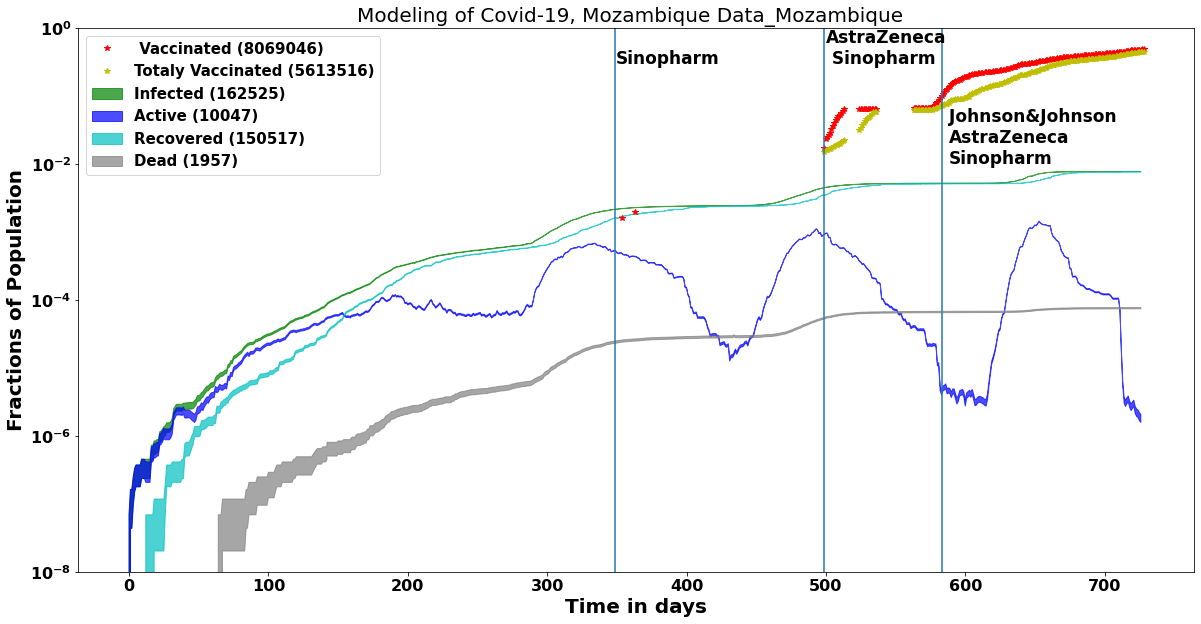

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)




alpha=0.7
plt.fill_between(data_time ,Dinfecteds-error_infectedf,Dinfecteds+error_infectedf,color='g',alpha=alpha,label='Infected (162525)')
plt.fill_between(data_time ,Dactifs-error_actif,Dactifs+error_actif,color='b',alpha=alpha,label='Active (10047)')
plt.fill_between(data_time ,Drecovereds-error_recovered,Drecovereds+error_recovered,color='c',alpha=alpha,label='Recovered (150517)')
plt.fill_between(data_time ,Ddeads-error_dead,Ddeads+error_dead,color='gray',alpha=alpha,label='Dead (1957)')

plt.plot(dados['Days1'],(dados['Fration_vaccinated']),"*",color='r',label=' Vaccinated (8069046)')
plt.plot(dados['Days1'],(dados['Fration_cumulative_completely_dosage']),"*",color='y',label='Totaly Vaccinated (5613516)')
plt.axvline(349)
plt.axvline(499)
plt.axvline(583)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)

plt.title('Modeling of Covid-19, Mozambique Data_Mozambique  ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

plt.yscale('log')
plt.ylim(10**-8, 10**-0)
plt.grid(False)
#plt.ylim(0, 2*10**-4)


#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 20
#fig_size[1] = 10
#plt.rcParams["figure.figsize"] = fig_size
#fig = plt.figure()
#ax = plt.subplot(111)





plt.yscale('log')


#plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)
#plt.xlabel("Time in days",fontsize=18)
#plt.ylabel("Fractions of Population Vaccinated",fontsize=18)
plt.text(349, 0.3, 'Sinopharm', fontsize=17)
plt.text(500, 0.3, 'AstraZeneca\n Sinopharm', fontsize=17)
plt.text(588, 0.01, 'Johnson&Johnson\nAstraZeneca\nSinopharm', fontsize=17)
#plt.title("Mozambique vaccination",fontsize=25)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-3, 10**0)

#plt.grid(True)
#plt.ylim(0, 2*10**-4)

plt.savefig("Mozambique Vaccination2", dpi=300, bbox_inches='tight')






#fig.savefig('SIDARTHE_model_fitting.pdf')


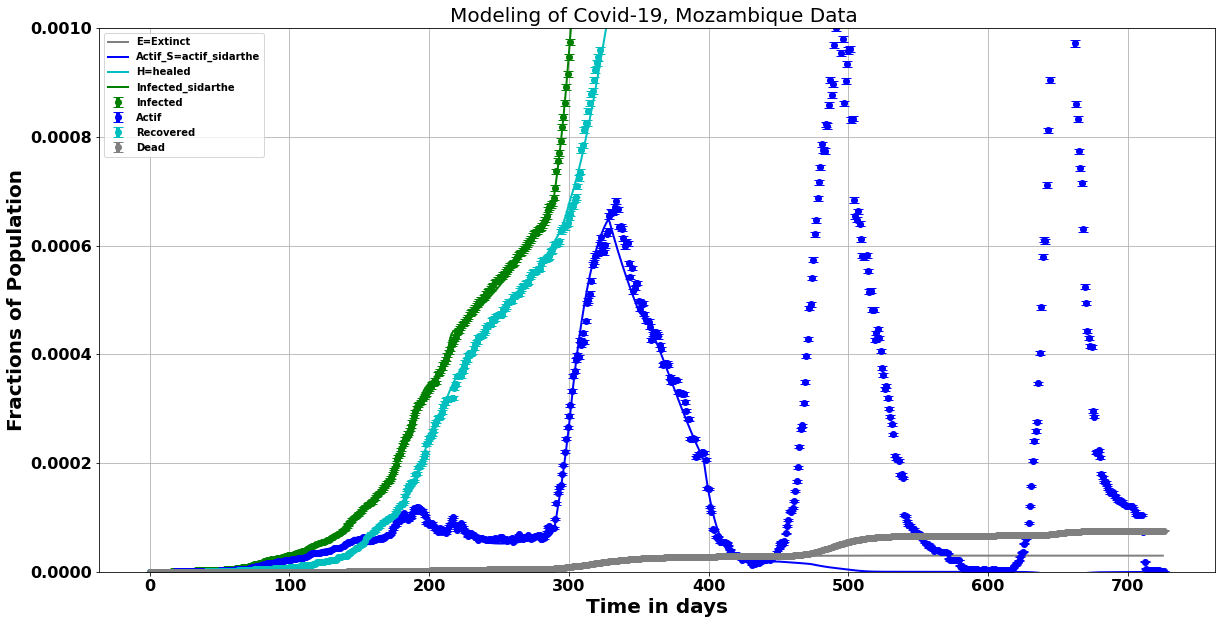

In [ ]:
fig = plt.figure()
#ax = plt.subplot(111)



#plt.semilogy(ax1.text(0.5,0.5,'left', color='r',fontsize=18, ha='center')'o',label='Infecteds',linewidth=6,color='g')
#plt.semilogy(data_time ,Dactifs,'o',label='Actifs',linewidth=6,color='b')
#plt.semilogy(data_time ,Drecovereds,'o',label='Recovered',linewidth=6,color='c')
#plt.semilogy(data_time ,Ddeads,'o',label='Dead',linewidth=6,color='gray')


plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actif',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)

plt.plot(t, E,'gray',label='E=Extinct',linewidth=2) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=2) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed',linewidth=2) # plotting t, b separately 
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=2)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)
plt.title('Modeling of Covid-19, Mozambique Data ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.ylim(0, 10**-3)

fig.savefig('SIDARTHE_model_fitting.pdf')



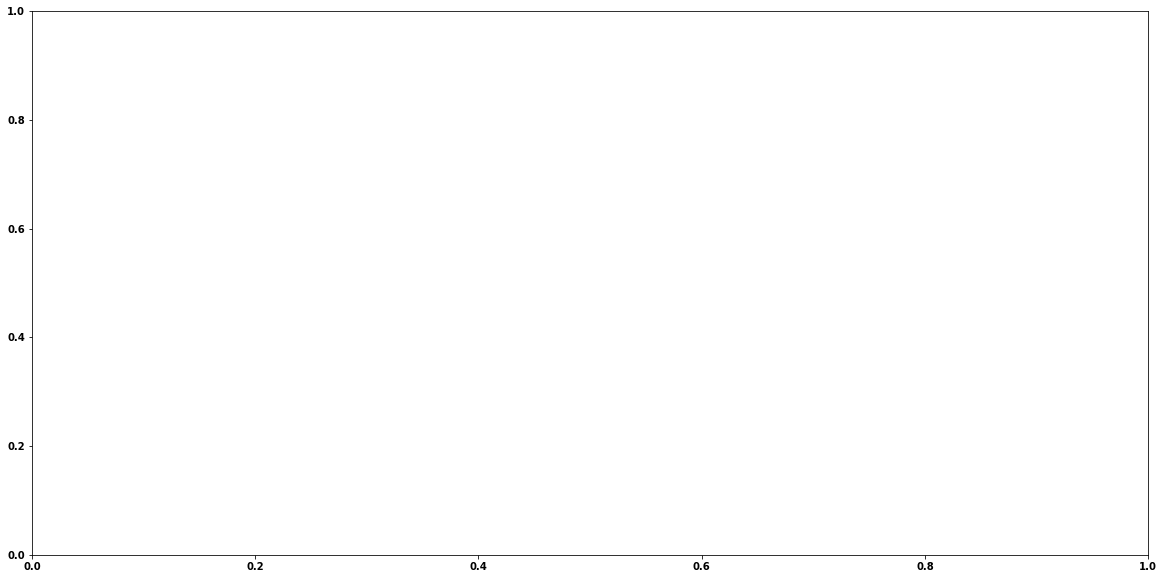

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
parmArray=np.array(parm)
parm_names =[r'$\alpha$', r'$\beta$', r'$\delta$', r'$\gamma$', r'$\epsilon$', r'$\zeta$', r'$\lambda$', r'$\eta$', r'$\rho$', r'$\theta$', r'$\mu$', r'$\kappa$', r'$\nu$', r'$\chi$', r'$\sigma$', r'$\tau$']


#for i in range(parmArray.shape[1]):
    #fig = plt.figure()
    #ax = plt.subplot(111)#(311)
    #plt.plot(t,parmArray[t, i],'b',label = parm_names[i], lw=4)#######################
    #plt.plot(t,parmArray[:, i],'b',label = parm_names[i], lw=4)#######################
    #plt.plot(t,parmArray[:, i],'black',label = parm_names[i], lw=4)
    #plt.plot(t2,parmArray[t2, i],'b', lw=4)
    #plt.xticks(fontsize=16)
    #plt.yticks(fontsize=16)
    #plt.xlim(0, 163)
    #plt.ylim(int(np.min(data_ActDif))-1, 5)
    #plt.title(r'Parameter '+parm_names[i],fontsize=20)
    #plt.xlabel("Time (days)", fontsize=20)
    #plt.ylabel(parm_names[i]+'(t)', fontsize=20)
    #plt.legend()
    #ax.legend(loc=1, prop={'size': 20})
    #plt.grid(False)
    #plt.savefig(r'FigParams/AllParameters-'+parm_names[i][2:-1]+'.png')
    #plt.savefig("parametros", dpi=300, bbox_inches='tight')
 


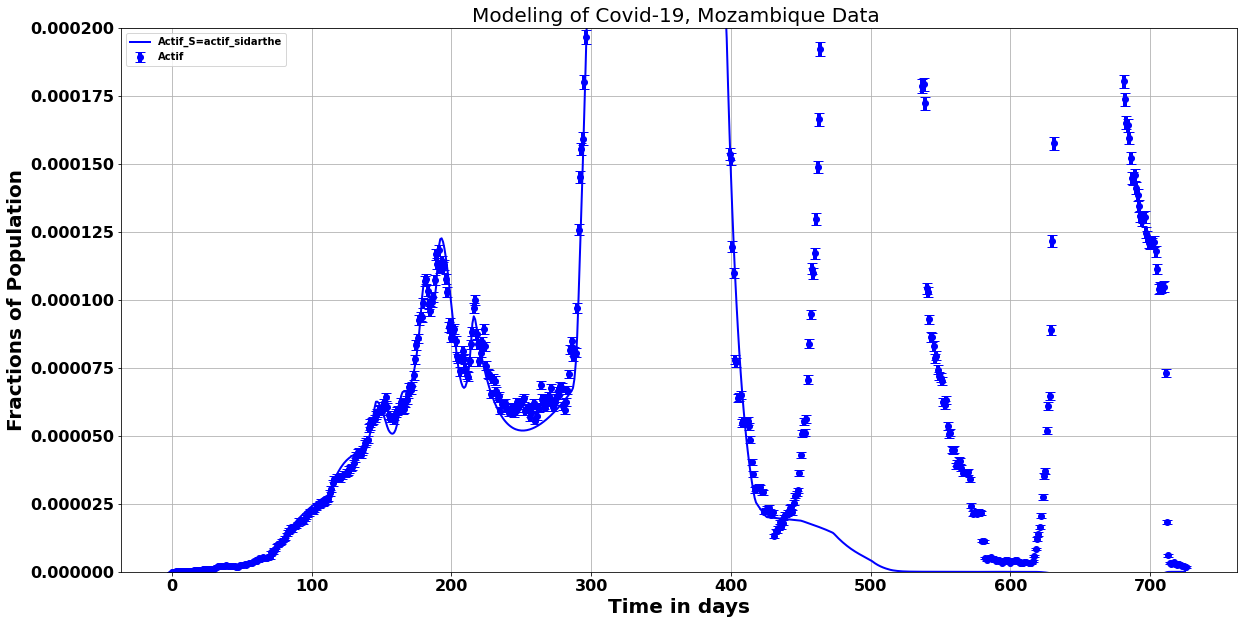

In [ ]:
fig = plt.figure()
#ax = plt.subplot(111)



#plt.semilogy(ax1.text(0.5,0.5,'left', color='r',fontsize=18, ha='center')'o',label='Infecteds',linewidth=6,color='g')
#plt.semilogy(data_time ,Dactifs,'o',label='Actifs',linewidth=6,color='b')
#plt.semilogy(data_time ,Drecovereds,'o',label='Recovered',linewidth=6,color='c')
#plt.semilogy(data_time ,Ddeads,'o',label='Dead',linewidth=6,color='gray')


#plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actif',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)

#plt.plot(t, E,'gray',label='E=Extinct',linewidth=2) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=2) # plotting t, c separately
#plt.plot(t, H,'c',label='H=healed',linewidth=2) # plotting t, b separately 
#plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=2)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)
plt.title('Modeling of Covid-19, Mozambique Data ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.ylim(0, 2*10**-4)

fig.savefig('SIDARTHE_model_fitting.pdf')


In [ ]:
#To see how to plot with error bars, go here: https://www.youtube.com/watch?v=xhizVO9SPjU
#infect=np.sqrt((data_infected))
#dea=np.sqrt((data_dead))
#act=np.sqrt((data_active))
#recov=np.sqrt((data_recovered))


In [ ]:
#uncert_infectedf=(np.divide(infect, Infected_sidarthe))/N
#uncert_actif=(np.divide(act, actif_sidarthe))/N
#uncert_dead=(np.divide(dea, E))/N
#uncert_recovered=(np.divide(recov, H))/N


In [ ]:
infect=((np.sqrt((data_infected)))/N)
dea=((np.sqrt((data_dead)))/N)
act=((np.sqrt((data_active)))/N)
recov=((np.sqrt((data_recovered)))/N)

uncert_infectedf=np.divide(infect, Infected_sidarthe)
uncert_actif=np.divide(act, actif_sidarthe)
uncert_dead=np.divide(dea, E)
uncert_recovered=np.divide(recov, H)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


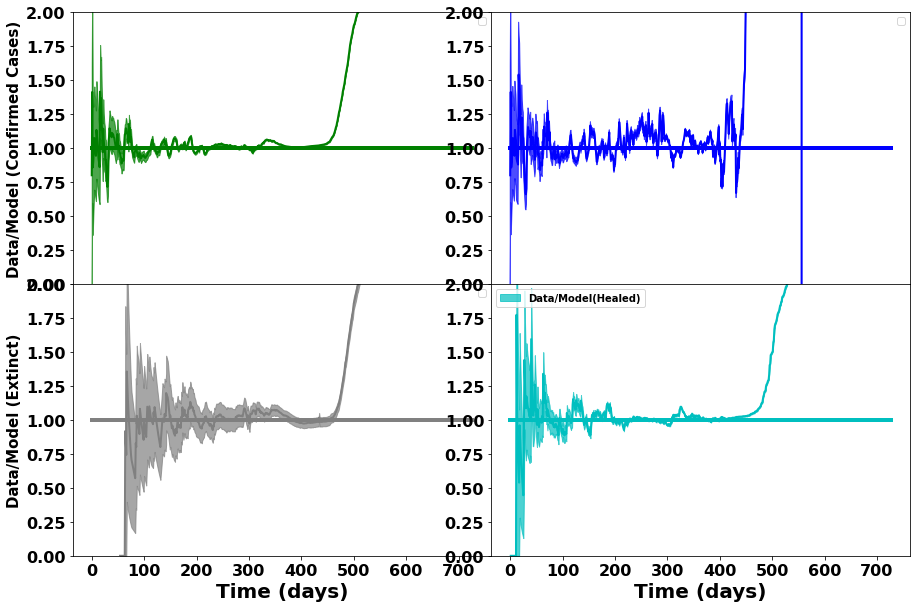

In [ ]:
fig = plt.figure(figsize=(15,10))
alpha=0.7
plt.subplot(221)

out=np.divide(Dinfecteds, Infected_sidarthe)
#print('\nOutput arry: \n',out)
plt.plot(data_time,out,'g',linewidth=2)
plt.plot(data_time,Goodness,'g',linewidth=4)
plt.fill_between(data_time ,out-uncert_infectedf,out+uncert_infectedf,color='g',alpha=alpha)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Data/Model (Confirmed Cases)",fontsize=15)
#plt.title('Goodness of Fit (Mozambique) ',fontsize=20)
plt.legend()
#plt.grid(True)
plt.ylim(0,2)

plt.subplot(222)
out1=np.divide(Dactifs, actif_sidarthe)
#print('\nOutput arry: \n',out1)
plt.plot(data_time,out1, 'b',linewidth=2)
plt.plot(data_time,Goodness,'b',linewidth=4)
plt.fill_between(data_time ,out1-uncert_actif,out1+uncert_actif,color='b',alpha=alpha)
plt.xticks(fontsize=1)
plt.yticks(fontsize=16)
#plt.xlabel("time (days)",fontsize=20)
#plt.ylabel("Data/Model (Active Cases)",fontsize=15)
#plt.title('Goodness of Fit (Mozambique) ',fontsize=20)
plt.legend()
#plt.grid(True)
plt.ylim(0,2)


plt.subplot(223)
out2=np.divide(Ddeads, E)
#print('\nOutput arry: \n',out2)
plt.plot(data_time,out2, 'gray',linewidth=2)
plt.plot(data_time,Goodness, 'gray',linewidth=4)
plt.fill_between(data_time ,out2-uncert_dead,out2+uncert_dead,color='gray',alpha=alpha)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel('Data/Model (Extinct)',fontsize=15)
#plt.title('Goodness of Fittings ',fontsize=20)
plt.legend()
#plt.grid(True)
plt.ylim(0,2)


plt.subplot(224)
out3=np.divide(Drecovereds, H)
#print('\nOutput arry: \n',out3)
plt.plot(data_time,out3, 'c',linewidth=2)
plt.plot(data_time,Goodness, 'c',linewidth=4)
plt.fill_between(data_time ,out3-uncert_recovered,out3+uncert_recovered,label='Data/Model(Healed)',color='c',alpha=alpha)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time (days)",fontsize=20)
#plt.ylabel("Data/Model (Healed)",fontsize=15)
#plt.title('Goodness of Fittings ',fontsize=20)
plt.legend()
#plt.grid(True)
plt.ylim(0,2)

plt.subplots_adjust(wspace=.0, hspace=.0)







#plt.savefig("Goodness of fitting' (R0)_Moz", dpi=300, bbox_inches='tight')








In [ ]:
t5 = data_time[550:-1]


In [ ]:
dosage=((np.sqrt((dados['good'])))/N)
uncert_dosage=(np.divide(dosage, V))/N



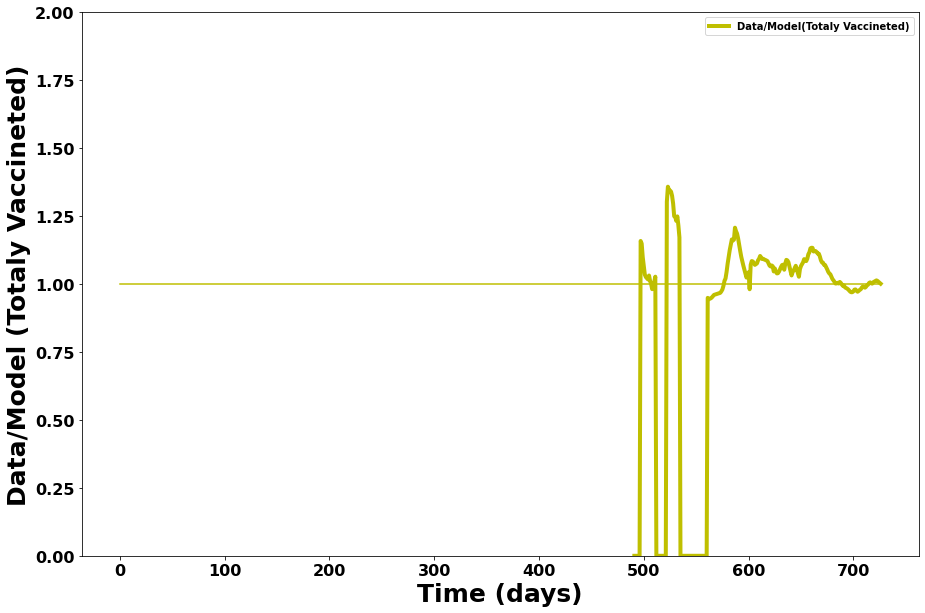

In [ ]:
fig = plt.figure(figsize=(15,10))
alpha=0.7


out5=np.divide(dados['Goodness_vaacine'], V)
#print('\nOutput arry: \n',out)
#plt.plot(data_time,out,'g',linewidth=2)
plt.plot(data_time,Goodness,'y')
plt.plot(data_time,out5, 'y',label='Data/Model(Totaly Vaccineted)',linewidth=4)
#plt.fill_between(data_time ,out5-uncert_dosage,out5+uncert_dosage,color='y',alpha=alpha)
#plt.fill_between(t5 ,out5[t5]-uncert_dosage[t5],out5[t5]+uncert_dosage[t5],color='y',alpha=alpha)
#plt.errorbar(data_time ,out,yerr=uncert_dosage,fmt='o', color='g',label='Dead',elinewidth=4,capsize=10)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time (days)",fontsize=25)
plt.ylabel("Data/Model (Totaly Vaccineted)",fontsize=25)
#plt.title('Goodness For Totaly Vaccinated ',fontsize=30)
plt.legend()
#plt.grid(True)
plt.ylim(0,2)
 

plt.savefig("Goodness for vaccine", dpi=300, bbox_inches='tight')

#

In [ ]:
t1 = data_time[497:512]
t2 = data_time[525:535]
t3 = data_time[561:-1]

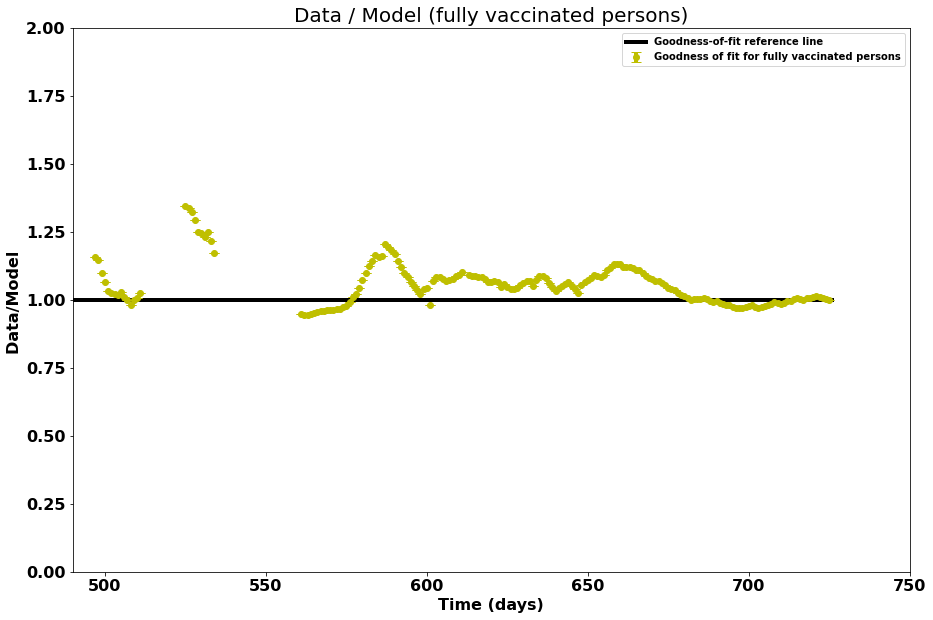

In [ ]:
fig = plt.figure(figsize=(15,10))
alpha=0.7


out5=np.divide(dados['Goodness_vaacine'], V)
#print('\nOutput arry: \n',out)
#plt.plot(data_time,out,'g',linewidth=2)
#plt.plot(data_time,Goodness,'y')
# plt.plot(t1,out5[t1], 'y',label='Data/Model(Totaly Vaccineted)',linewidth=4)
# plt.plot(t2,out5[t2], 'y',linewidth=4)
# plt.plot(t3,out5[t3], 'y',linewidth=4)

#plt.fill_between(data_time ,out5-uncert_dosage,out5+uncert_dosage,color='y',alpha=alpha)
#plt.fill_between(t1 ,out5[t1]-uncert_dosage[t1],out5[t1]+uncert_dosage[t1],color='y',alpha=alpha)
#plt.fill_between(t2 ,out5[t2]-uncert_dosage[t2],out5[t2]+uncert_dosage[t2],color='y',alpha=alpha)
#plt.fill_between(t3 ,out5[t3]-uncert_dosage[t3],out5[t3]+uncert_dosage[t3],color='y',alpha=alpha)

#plt.errorbar(data_time ,out,yerr=uncert_dosage,fmt='o', color='g',label='Dead',elinewidth=4,capsize=10)

plt.plot(data_time,Goodness,'black',linewidth=4,label='Goodness-of-fit reference line')
#plt.fill_between(data_time ,out5-uncert_vaccine,out5+uncert_vaccine,color='y',alpha=alpha)
plt.errorbar(t1,out5[t1],yerr=uncert_dosage[t1],fmt='o', color='y',label='Goodness of fit for fully vaccinated persons',elinewidth=4,capsize=5)
plt.errorbar(t2,out5[t2],yerr=uncert_dosage[t2],fmt='o', color='y',elinewidth=4,capsize=5)
plt.errorbar(t3,out5[t3],yerr=uncert_dosage[t3],fmt='o', color='y',elinewidth=4,capsize=5)

#plt.scatter(data_time,out5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time (days)",fontsize=16)
plt.ylabel("Data/Model ",fontsize=16)
plt.title('Data / Model (fully vaccinated persons)',fontsize=20)
#plt.title('Goodness For Totaly Vaccinated ',fontsize=30)
plt.legend()
#plt.grid(True)
plt.ylim(0,2)
plt.xlim(490,750) 

plt.savefig("GoodnessMOZ", dpi=300, bbox_inches='tight')


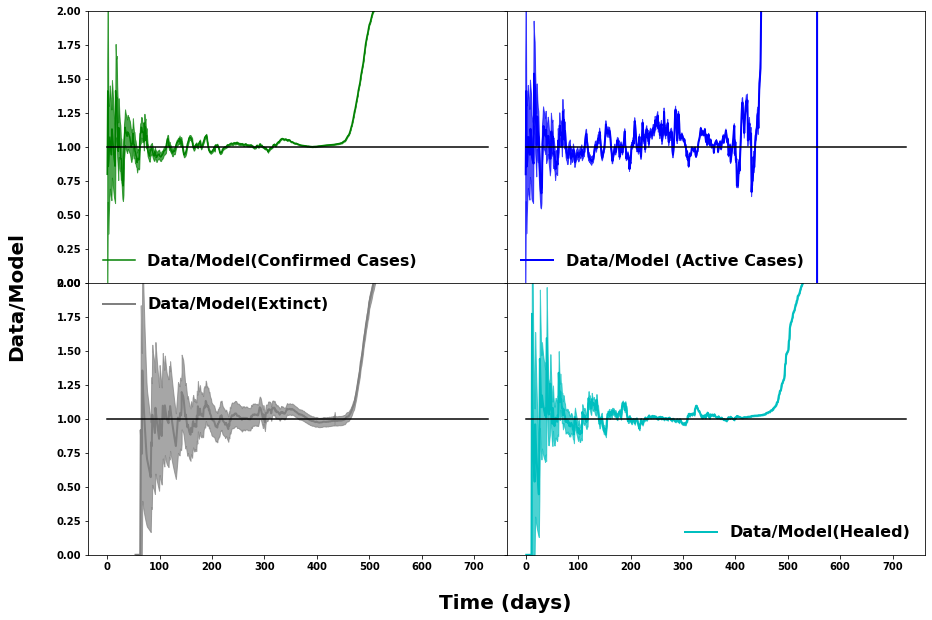

In [ ]:

fig,ax=plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10))
alpha=0.7

ax[0,0].plot(data_time,out,'g',label='Data/Model(Confirmed Cases)')
ax[0,0].plot(data_time,Goodness,'black')
ax[0,0].fill_between(data_time ,out-uncert_infectedf,out+uncert_infectedf,color='g',alpha=alpha)
ax[0,0].legend(loc=1)
ax[0,0].legend(frameon=False,fontsize=16)
#ax[0,0].plot.xticks(fontsize=16)
#ax[0,0].plt.yticks(fontsize=16)
#ax[0,0].set_ylabel("Data/Model",fontsize=15)
#ax[0,0].plt.legend()


ax[0,1].plot(data_time,out1, 'b',label='Data/Model (Active Cases)',linewidth=2)
ax[0,1].plot(data_time,Goodness,'black')
ax[0,1].fill_between(data_time ,out1-uncert_actif,out1+uncert_actif,color='b',alpha=alpha)
ax[0,1].legend(loc=1)
ax[0,1].legend(frameon=False,fontsize=16)


ax[1,0].plot(data_time,out2, 'gray',label='Data/Model(Extinct)',linewidth=2)
ax[1,0].plot(data_time,Goodness, 'black')
ax[1,0].fill_between(data_time ,out2-uncert_dead,out2+uncert_dead,color='gray',alpha=alpha)
ax[1,0].legend(loc=1)
ax[1,0].legend(frameon=False,fontsize=16)
#ax[1,0].set_ylabel("Data/Model",fontsize=15)
#ax[1,0].set_xlabel("Time (days)",fontsize=15)

ax[1,1].plot(data_time,out3, 'c', label='Data/Model(Healed)',linewidth=2)
ax[1,1].plot(data_time,Goodness, 'black')
ax[1,1].fill_between(data_time ,out3-uncert_recovered,out3+uncert_recovered,color='c',alpha=alpha)
ax[1,1].legend(loc=1)
ax[1,1].legend(frameon=False,fontsize=16)
#ax[1,1].set_xlabel("Time (days)",fontsize=15)
plt.ylim(0,2)
plt.subplots_adjust(wspace=.0, hspace=.0)
fig.text(0.05, 0.4, "Data/Model", rotation='vertical',fontsize=20)
fig.text(0.45, 0.05, "Time (days)", rotation='horizontal',fontsize=20)

plt.savefig("Goodness of fitting' (R0)_Moz", dpi=300, bbox_inches='tight')





726


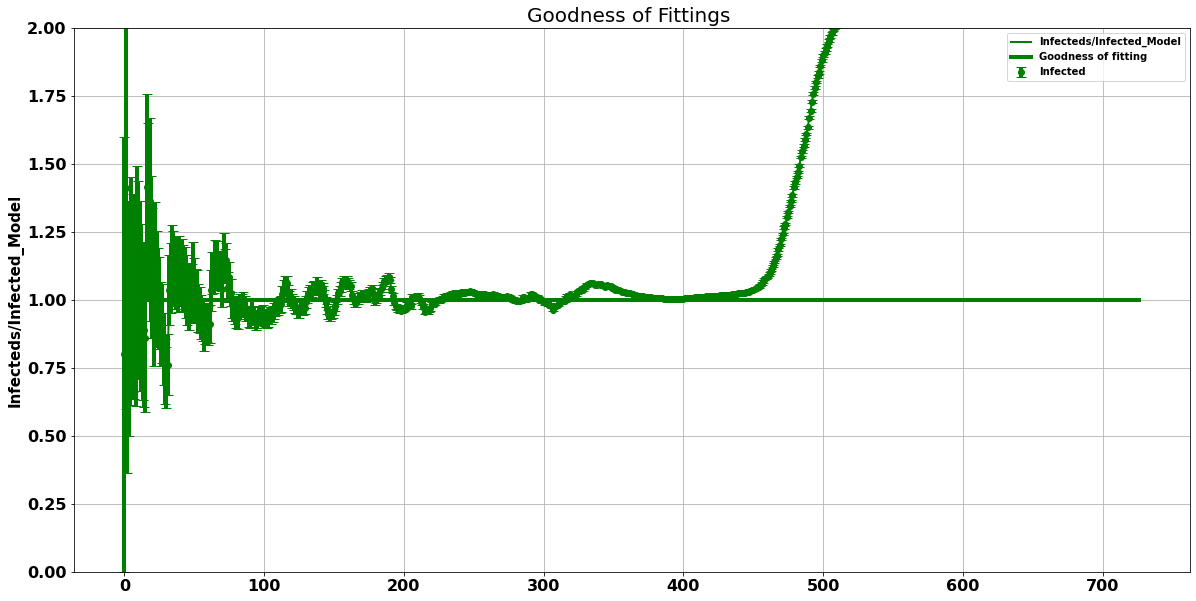

In [ ]:
out=np.divide(Dinfecteds, Infected_sidarthe)
#print('\nOutput arry: \n',out)
plt.plot(data_time,out,'g',label='Infecteds/Infected_Model',linewidth=2)
plt.plot(data_time,Goodness,'g',label='Goodness of fitting',linewidth=4)
plt.errorbar(data_time ,out,yerr=uncert_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Infecteds/Infected_Model",fontsize=15)
plt.title('Goodness of Fittings ',fontsize=20)
plt.legend()
plt.grid(True)
plt.ylim(0,2)
print(len(data_time)) 

(0.0, 2.0)

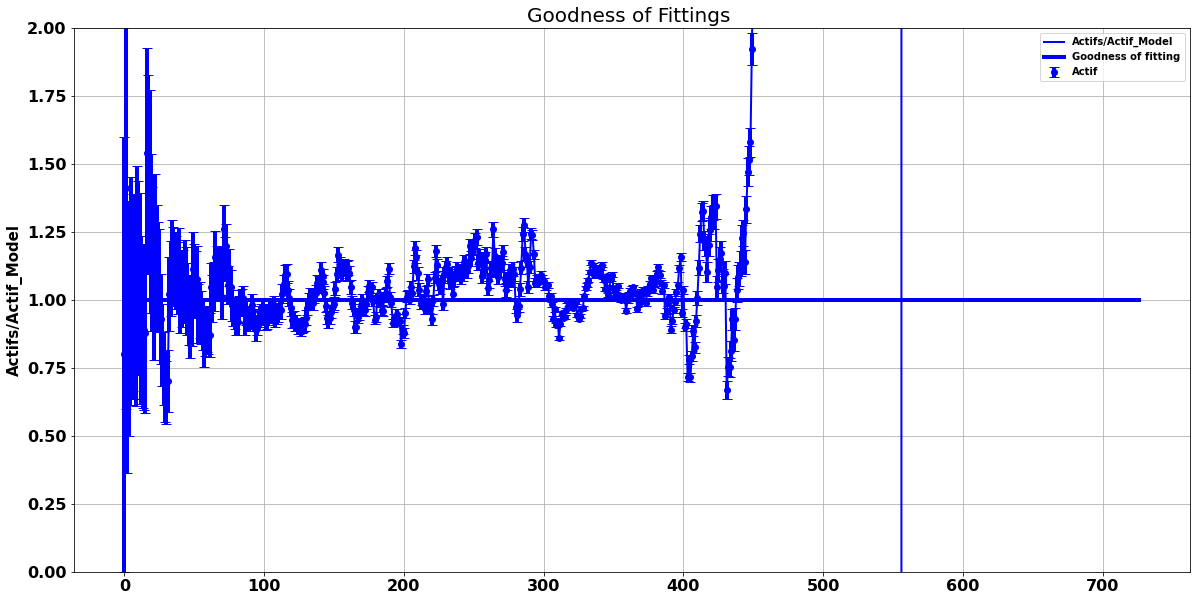

In [ ]:
out1=np.divide(Dactifs, actif_sidarthe)
#print('\nOutput arry: \n',out1)
plt.plot(data_time,out1, 'b',label='Actifs/Actif_Model',linewidth=2)
plt.plot(data_time,Goodness,'b',label='Goodness of fitting',linewidth=4)
plt.errorbar(data_time ,out1,yerr=uncert_actif,fmt='o', color='b',label='Actif',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Actifs/Actif_Model",fontsize=15)
plt.title('Goodness of Fittings ',fontsize=20)
plt.legend()
plt.grid(True)
plt.ylim(0,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


(0.0, 2.0)

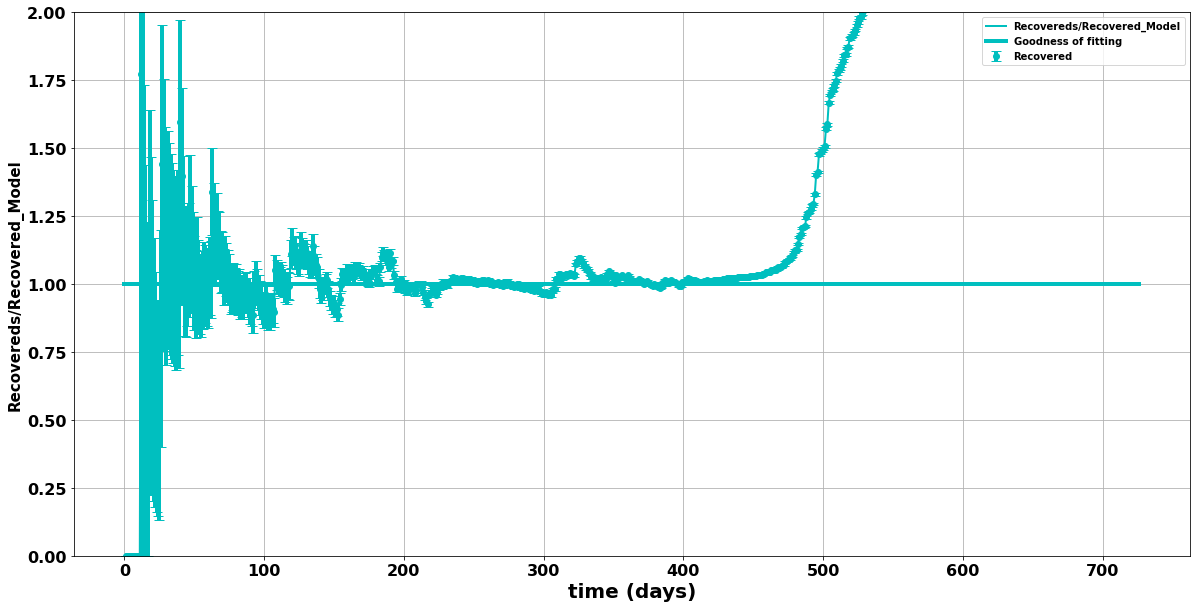

In [ ]:
out3=np.divide(Drecovereds, H)
#print('\nOutput arry: \n',out3)
plt.plot(data_time,out3, 'c',label='Recovereds/Recovered_Model',linewidth=2)
plt.plot(data_time,Goodness, 'c',label='Goodness of fitting',linewidth=4)
plt.errorbar(data_time ,out3,yerr=uncert_recovered,fmt='o', color='c',label='Recovered',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Recovereds/Recovered_Model",fontsize=15)
#plt.title('Goodness of Fittings ',fontsize=20)
plt.legend()
plt.grid(True)
plt.ylim(0,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


(0.0, 2.0)

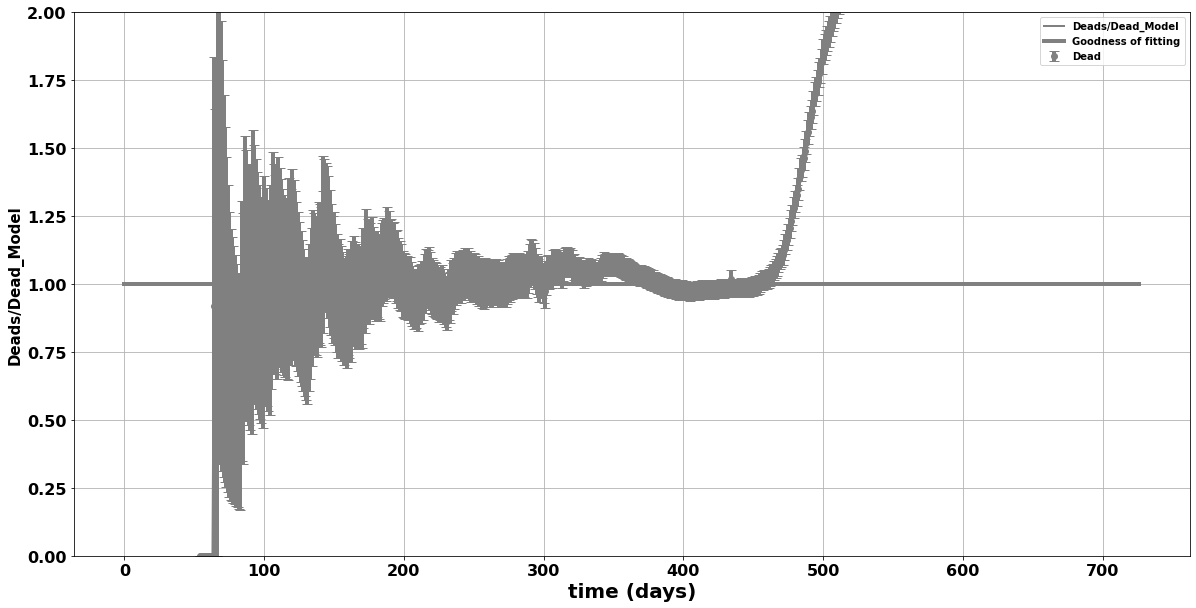

In [ ]:
out2=np.divide(Ddeads, E)
#print('\nOutput arry: \n',out2)
plt.plot(data_time,out2, 'gray',label='Deads/Dead_Model',linewidth=2)
plt.plot(data_time,Goodness, 'gray',label='Goodness of fitting',linewidth=4)
plt.errorbar(data_time ,out2,yerr=uncert_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("time (days)",fontsize=20)
plt.ylabel('Deads/Dead_Model',fontsize=15)
#plt.title('Goodness of Fittings ',fontsize=20)
plt.legend()
plt.grid(True)
plt.ylim(0,2)

AttributeError: ignored

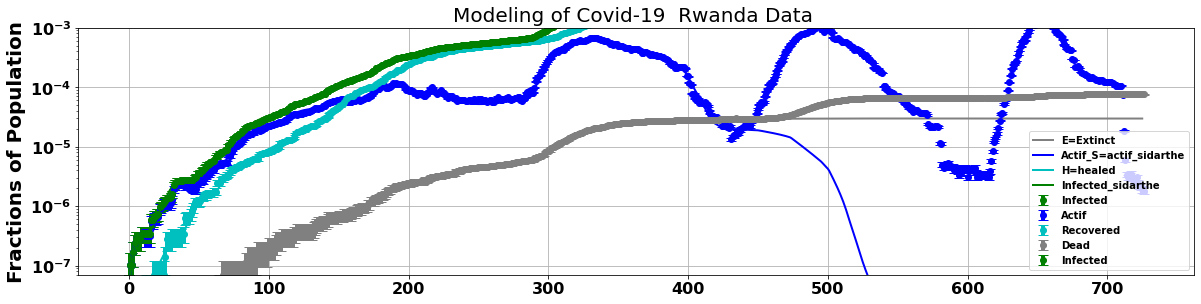

In [ ]:
fig = plt.figure()
#ax = plt.subplot(111)



#plt.semilogy(ax1.text(0.5,0.5,'left', color='r',fontsize=18, ha='center')'o',label='Infecteds',linewidth=6,color='g')
#plt.semilogy(data_time ,Dactifs,'o',label='Actifs',linewidth=6,color='b')
#plt.semilogy(data_time ,Drecovereds,'o',label='Recovered',linewidth=6,color='c')
#plt.semilogy(data_time ,Ddeads,'o',label='Dead',linewidth=6,color='gray')



plt.subplot(211)
plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actif',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)
plt.plot(t, E,'gray',label='E=Extinct',linewidth=2) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=2) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed',linewidth=2) # plotting t, b separately 
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=2)
plt.yscale('log')
plt.ylim(7*10**-8, 10**-3)
plt.grid(True)
#plt.ylim(0, 10**-4)

plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Fractions of Population",fontsize=20)
plt.title('Modeling of Covid-19  Rwanda Data ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.subplot(212)
plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actif',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)
plt.plot(t, E,'gray',label='E=Extinct',linewidth=2) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=2) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed',linewidth=2) # plotting t, b separately 
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=2)

plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)

plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.ylim(0, 4.1*10**-4)

fig.savefig('SIDARTHE_model_fitting.pdf')

In [ ]:
plt.subplot(211)
plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Infected ',fontsize=20)
plt.ylabel("Fractions of Population",fontsize=15)
plt.legend()
ax.legend(loc=2, prop={'size': 15})
plt.yscale('log')
plt.ylim(10**-8, 10**-3)
plt.grid(True)

plt.subplot(212)
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=2)

plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=15)

plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.ylim(0, 2*10**-4)


In [ ]:
plt.subplot(211)
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=2) # plotting t, c separatel
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actif',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("time (days)",fontsize=15)
plt.title('Active ',fontsize=20)
plt.legend()
plt.ylabel("Fractions of Population",fontsize=15)
ax.legend(loc=2, prop={'size': 15})
plt.yscale('log')
plt.ylim(10**-8, 10**-3)
plt.grid(True)

plt.subplot(212)
plt.plot(t, actif_sidarthe,'b',label='c_S=actif_sidarthe',linewidth=2) # plotting t, c separately
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Active',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=15)

plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.ylim(0, 2*10**-4)


In [ ]:
plt.subplot(211)

plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered',elinewidth=4,capsize=5)
plt.plot(t, H,'c',label='H=healed',linewidth=2) # plotting t, b separately 
plt.xticks(fontsize=16)
plt.ylabel("Fractions of Population",fontsize=15)
plt.yticks(fontsize=16)
plt.title('Recovered ',fontsize=20)

plt.legend()
ax.legend(loc=2, prop={'size': 15})
plt.yscale('log')
plt.ylim(10**-8, 10**-3)
plt.grid(True)

plt.subplot(212)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered',elinewidth=4,capsize=5)
plt.plot(t, H,'c',label='H=healed',linewidth=2) # plotting t, b separately 

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=15)
#plt.title('Modeling of Covid-19  Mozambique Data ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.ylim(0, 2*10**-4)


###### plt.subplot(211)

plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)
plt.plot(t, E,'gray',label='E=Extinct',linewidth=2) # plotting t, c separately 
plt.xticks(fontsize=16)
plt.title('Dead ',fontsize=20)
#plt.xlabel("time (days)",fontsize=15)
plt.yticks(fontsize=16)
plt.ylabel("Fractions of Population",fontsize=15)
plt.legend()
ax.legend(loc=2, prop={'size': 15})
plt.yscale('log')
plt.ylim(10**-8, 10**-3)
plt.grid(True)

plt.subplot(212)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)

plt.plot(t, E,'gray',label='E=Extinct',linewidth=2) # plotting t, c separately 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=15)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.ylim(0, 2*10**-4)



In [ ]:
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
ax0=plt.subplot(gs[0])
ax0.set_yscale('log')

#plt.semilogy(data_time ,Dinfecteds,'o',label='Infecteds',linewidth=6,color='g')
#plt.semilogy(data_time ,Dactifs,'o',label='Actifs',linewidth=6,color='b')
#plt.semilogy(data_time ,Drecovereds,'o',label='Recovered',linewidth=6,color='c')
#plt.semilogy(data_time ,Ddeads,'o',label='Dead',linewidth=6,color='gray')

plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Confirmed Cases (Data)',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Active Cases (Data)',elinewidth=4,capsize=5,s=1)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Healed (Data)',elinewidth=4,capsize=5)
#plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Extinct (Data)',elinewidth=4,capsize=5)


plt.plot(t, H,'c',label='Healed (Model)',linewidth=4) # plotting t, b separately
#plt.plot(t, E,'gray',label='Extinct (Model)',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Active Cases (Model)',linewidth=4) # plotting t, c separately 
plt.plot(t, Infected_sidarthe, 'g',label='Total Cases (Model)',linewidth=4)




#plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=17)

plt.title('Modeling of COVID-19 (Mozambique ) ',fontsize=20)
plt.legend()
#ax.legend(loc=2, prop={'size': 17})


plt.yscale('log')
plt.ylim(4*10**-8, 2*10**-2)
#plt.grid(True)
#plt.ylim(0, 2*10**-4)
plt.legend(loc='upper left',prop={'size':14})
plt.savefig("Modeling of Covid-19,Mozambique", dpi=300, bbox_inches='tight')
plt.legend(frameon=False,fontsize=16)


ax1=plt.subplot(gs[1], sharex=ax0)



alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='Basic reproduction number ($R_{0}$)',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-DR0,R0+DR0,color='r',alpha=alpha,label='Total uncertainty')
plt.plot(data_time,Goodness,'y',label='R0(t)=1' )
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Basic Reproduction Number (R0)_Cameroon ',fontsize=20)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel("$R_0$",fontsize=20)
plt.legend(loc='upper right',prop={'size':14})
#plt.xscale("log")
#plt.yscale("log")
#plt.grid(True)
plt.subplots_adjust(hspace=.0)
plt.legend(frameon=False, fontsize=16)
plt.savefig("Modeling of Covid-19, Mozambique Data", dpi=300, bbox_inches='tight')

